## Natural Gas

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import xlrd
import openpyxl
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

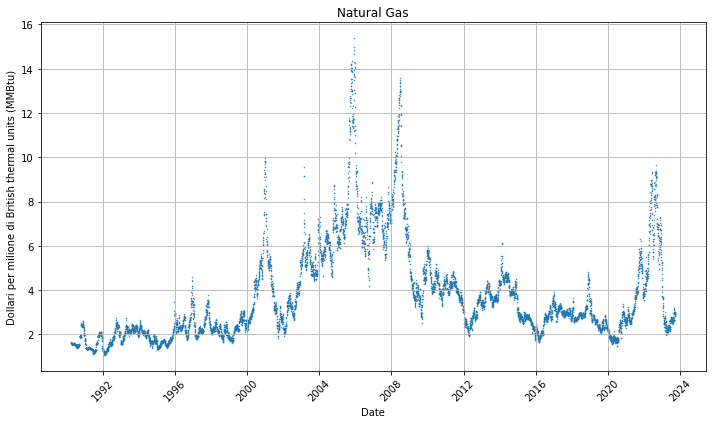

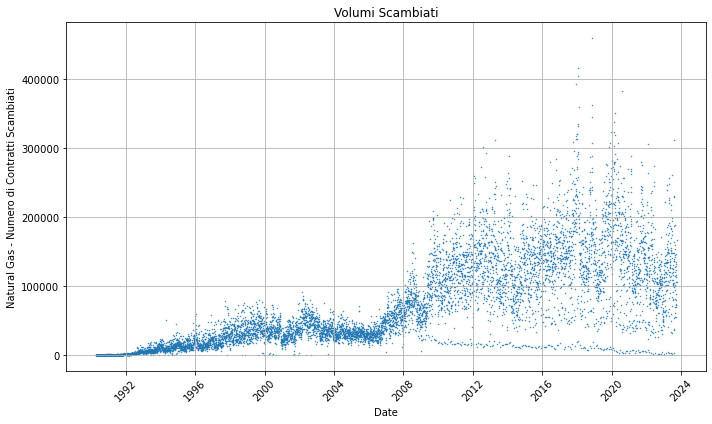

In [2]:
#FONTE: https://www.investing.com/commodities/natural-gas-historical-data

GAS1 = pd.read_csv("GAS1.csv")
GAS2 = pd.read_csv("GAS2.csv")
GAS = pd.concat([GAS1, GAS2], ignore_index=True)

GAS['Date'] = pd.to_datetime(GAS['Date'], format='%m/%d/%Y')

GAS = GAS.sort_values(by='Date')
GAS = GAS.reset_index(drop=True)

GAS['Price'] = GAS['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(GAS['Date'], GAS['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Dollari per milione di British thermal units (MMBtu)') 
plt.title('Natural Gas')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

l = []
for elem in GAS['Vol.']:
    if(type(elem) == float):
        l.append(elem)
    elif(elem[len(elem)-1] == 'K'):
        l.append(float(elem[:len(elem)-1])*1000)
    else:
        print("ERRORE! Ci dev'essere qualche altro suffisso tipo M o G!")
        break
GAS['Vol.'] = l

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(GAS['Date'], GAS['Vol.'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Natural Gas - Numero di Contratti Scambiati') 
plt.title('Volumi Scambiati')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [3]:
#Formato data ok
GAS

,Date,Price,Open,High,Low,Vol.,Change %
0,1990-04-04,1.620,1.600,1.650,1.599,80.0,-0.92%
1,1990-04-05,1.615,1.615,1.635,1.610,60.0,-0.31%
2,1990-04-06,1.625,1.615,1.635,1.610,60.0,0.62%
3,1990-04-09,1.637,1.612,1.640,1.612,40.0,0.74%
4,1990-04-10,1.620,1.627,1.630,1.613,30.0,-1.04%
...,...,...,...,...,...,...,...
8525,2023-09-21,2.840,2.925,2.963,2.832,123550.0,-2.77%
8526,2023-09-22,2.879,2.844,2.912,2.834,105570.0,1.37%
8527,2023-09-25,2.906,2.889,2.937,2.862,105420.0,0.94%
8528,2023-09-26,2.845,2.904,2.906,2.796,167230.0,-2.10%


## Petrolio

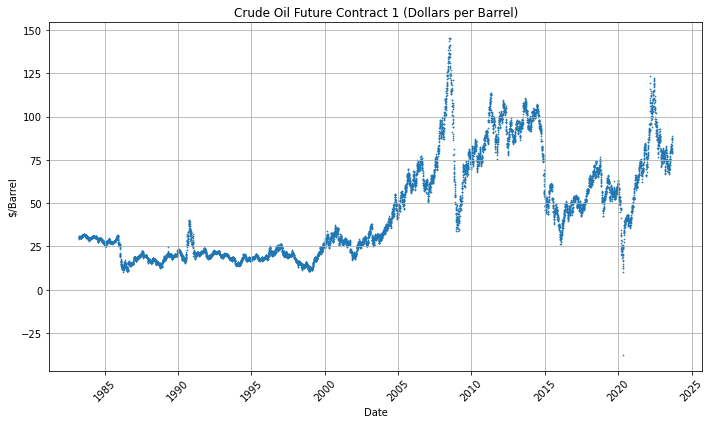

In [4]:
# FONTE: https://www.eia.gov/dnav/pet/hist/RCLC1D.htm

# Percorso del file Excel XLS
file_path = "Crude Oil.xls"
# Apre il file Excel
workbook = xlrd.open_workbook(file_path)
# Ottiene la prima pagina (worksheet)
worksheet = workbook.sheet_by_index(1)

PETROLIOtmp = []

# Legge i dati dalla prima pagina
for row_index in range(worksheet.nrows):
    if(row_index == 0 or row_index == 1 or row_index == 2): #Salto l'intestazione del Workbook
        continue
    rowToInsert = []
    for col_index in range(worksheet.ncols):
        cell_value = worksheet.cell_value(row_index, col_index)
        if(col_index == 0): #La libreria xlrd restituisce le date come float, dove la parte intera rappresenta il numero di giorni a partire da una data di riferimento (solitamente il 1 gennaio 1900 o il 1 gennaio 1904) e la parte decimale rappresenta l'ora come frazione del giorno.
                            #Per convertire questo valore in una data leggibile, puoi utilizzare la funzione xlrd.xldate_as_tuple() fornita dalla stessa libreria xlrd
            date_tuple = xlrd.xldate_as_tuple(cell_value, workbook.datemode)
            date_obj = datetime(*date_tuple) # Costruisce un oggetto datetime dalla tupla
            rowToInsert.append(date_obj.strftime('%d-%m-%Y'))
        else:    
            rowToInsert.append(cell_value)
        PETROLIOtmp.append(rowToInsert)
    
# Converte la lista in un DataFrame di pandas
PETROLIO = pd.DataFrame(PETROLIOtmp, columns=['Date', 'Value'])

# Converte la colonna 'Date' in formato datetime
PETROLIO['Date'] = pd.to_datetime(PETROLIO['Date'], format='%d-%m-%Y')

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(PETROLIO['Date'], PETROLIO['Value'], s=0.2)
plt.xlabel('Date')
plt.ylabel('$/Barrel') #1 Barrel = 160 litri
plt.title('Crude Oil Future Contract 1 (Dollars per Barrel)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [5]:
#Formato data ok
PETROLIO

,Date,Value
0,1983-04-04,29.44
1,1983-04-04,29.44
2,1983-04-05,29.71
3,1983-04-05,29.71
4,1983-04-06,29.92
...,...,...
20305,2023-09-08,87.51
20306,2023-09-11,87.29
20307,2023-09-11,87.29
20308,2023-09-12,88.84


## Rame

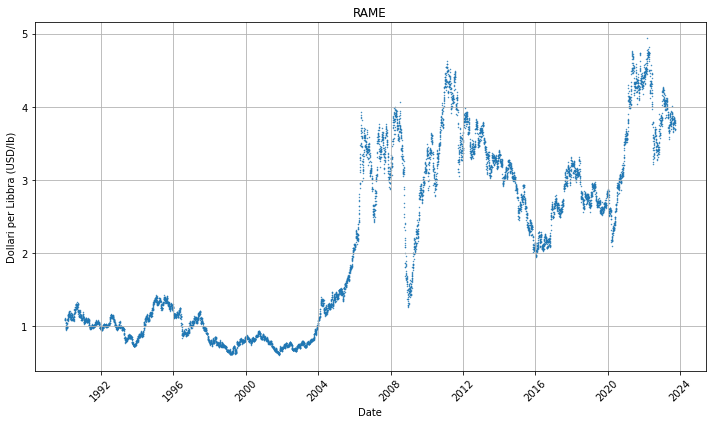

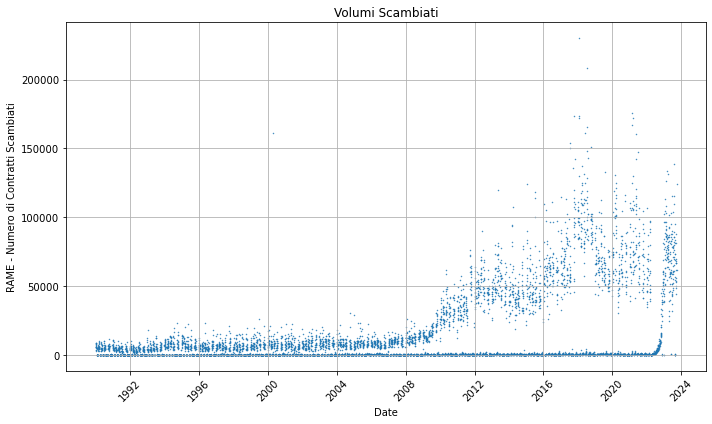

In [6]:
#FONTE: https://www.investing.com/commodities/copper-historical-data

RAME1 = pd.read_csv("RAME1.csv")
RAME2 = pd.read_csv("RAME2.csv")
RAME = pd.concat([RAME1, RAME2], ignore_index=True)

RAME['Date'] = pd.to_datetime(RAME['Date'], format='%m/%d/%Y')

RAME = RAME.sort_values(by='Date')
RAME = RAME.reset_index(drop=True)

RAME['Price'] = RAME['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(RAME['Date'], RAME['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Dollari per Libbra (USD/lb)') 
plt.title('RAME')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

l = []
for elem in RAME['Vol.']:
    if(type(elem) == float):
        l.append(elem)
    elif(elem[len(elem)-1] == 'K'):
        l.append(float(elem[:len(elem)-1])*1000)
    else:
        print("ERRORE! Ci dev'essere qualche altro suffisso tipo M o G!")
        break
RAME['Vol.'] = l

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(RAME['Date'], RAME['Vol.'], s=0.2)
plt.xlabel('Date')
plt.ylabel('RAME - Numero di Contratti Scambiati') 
plt.title('Volumi Scambiati')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [7]:
#Formato data ok
RAME

,Date,Price,Open,High,Low,Vol.,Change %
0,1990-01-03,1.0965,1.0685,1.0980,1.0670,8630.0,3.25%
1,1990-01-04,1.0855,1.1010,1.1160,1.0800,8940.0,-1.00%
2,1990-01-05,1.0950,1.0960,1.1020,1.0870,3640.0,0.88%
3,1990-01-08,1.1135,1.0975,1.1180,1.0850,7480.0,1.69%
4,1990-01-09,1.1020,1.1200,1.1250,1.1000,5720.0,-1.03%
...,...,...,...,...,...,...,...
8543,2023-09-20,3.7760,3.7520,3.7895,3.7385,50330.0,0.77%
8544,2023-09-21,3.6960,3.7410,3.7470,3.6340,124290.0,-2.12%
8545,2023-09-22,3.6960,3.6910,3.7410,3.6855,61880.0,0.00%
8546,2023-09-24,3.7017,3.6935,3.7027,3.6925,NaN,0.15%


## ORO

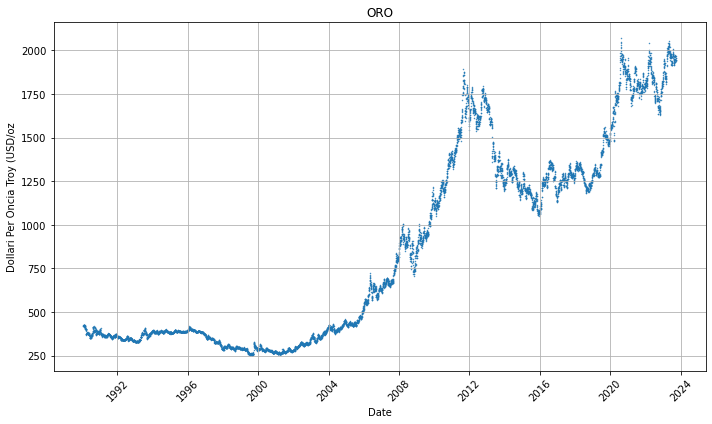

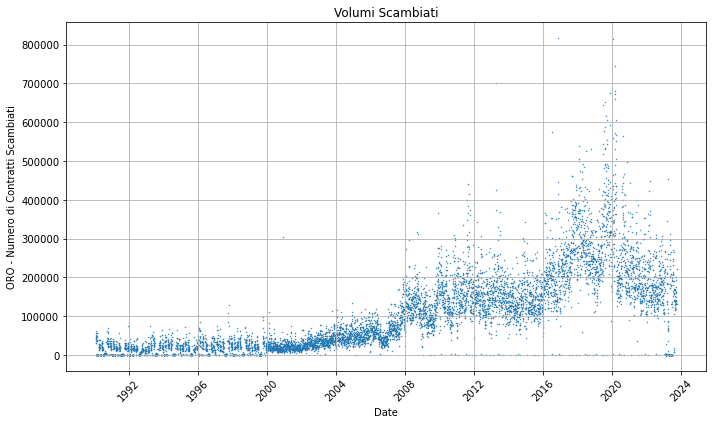

In [8]:
#FONTE: https://www.investing.com/commodities/ORO-historical-data

ORO1 = pd.read_csv("ORO1.csv")
ORO2 = pd.read_csv("ORO2.csv")
ORO = pd.concat([ORO1, ORO2], ignore_index=True)

ORO['Date'] = pd.to_datetime(ORO['Date'], format='%m/%d/%Y')

ORO = ORO.sort_values(by='Date')
ORO = ORO.reset_index(drop=True)

ORO['Price'] = ORO['Price'].str.replace(',', '')

# Converti la colonna 'Price' in float
ORO['Price'] = ORO['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(ORO['Date'], ORO['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Dollari Per Oncia Troy (USD/oz') 
plt.title('ORO')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

l = []
for elem in ORO['Vol.']:
    if(type(elem) == float):
        l.append(elem)
    elif(elem[len(elem)-1] == 'K'):
        l.append(float(elem[:len(elem)-1])*1000)
    else:
        print("ERRORE! Ci dev'essere qualche altro suffisso tipo M o G!")
        break
ORO['Vol.'] = l

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(ORO['Date'], ORO['Vol.'], s=0.2)
plt.xlabel('Date')
plt.ylabel('ORO - Numero di Contratti Scambiati') 
plt.title('Volumi Scambiati')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [9]:
#Formato data ok
ORO

,Date,Price,Open,High,Low,Vol.,Change %
0,1990-01-24,420.40,420.40,420.40,420.40,130.0,0.98%
1,1990-01-25,418.90,418.90,418.90,418.90,0.0,-0.36%
2,1990-01-26,423.00,423.00,423.00,423.00,10.0,0.98%
3,1990-01-29,422.00,422.00,422.00,422.00,20.0,-0.24%
4,1990-01-30,423.90,424.30,427.00,422.70,44340.0,0.45%
...,...,...,...,...,...,...,...
8570,2023-09-20,1967.10,"1,953.00","1,968.90","1,948.60",220980.0,0.69%
8571,2023-09-21,1939.60,"1,952.00","1,952.20","1,933.10",NaN,-1.40%
8572,2023-09-22,1945.60,"1,939.60","1,949.10","1,939.60",NaN,0.31%
8573,2023-09-24,1944.40,"1,944.95","1,946.05","1,944.10",NaN,-0.06%


## NASDAQ

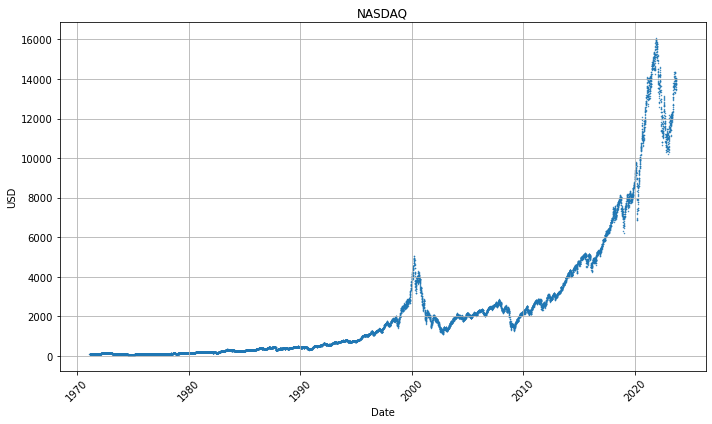

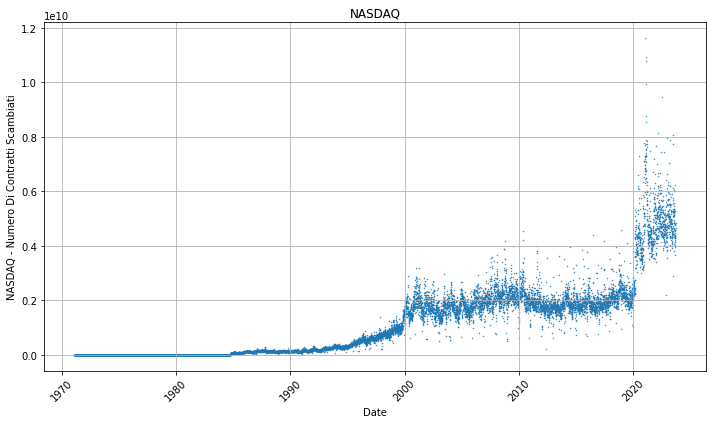

In [10]:
#FONTE: https://it.finance.yahoo.com/quote/%5EIXIC?p=%5EIXIC

NASDAQ = pd.read_csv("NASDAQ.csv")

NASDAQ['Date'] = pd.to_datetime(NASDAQ['Date'], format='%Y-%m-%d')

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(NASDAQ['Date'], NASDAQ['Close'], s=0.2)
plt.xlabel('Date')
plt.ylabel('USD') 
plt.title('NASDAQ')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(NASDAQ['Date'], NASDAQ['Volume'], s=0.2)
plt.xlabel('Date')
plt.ylabel('NASDAQ - Numero Di Contratti Scambiati') 
plt.title('NASDAQ')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [11]:
#Formato data ok
NASDAQ

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...,...
13262,2023-09-08,13754.709961,13843.370117,13733.179688,13761.530273,13761.530273,4160360000
13263,2023-09-11,13884.030273,13937.469727,13805.129883,13917.889648,13917.889648,4538870000
13264,2023-09-12,13858.940430,13913.599609,13763.690430,13773.610352,13773.610352,4595490000
13265,2023-09-13,13773.669922,13868.570313,13733.820313,13813.589844,13813.589844,4840310000


## S&P 500

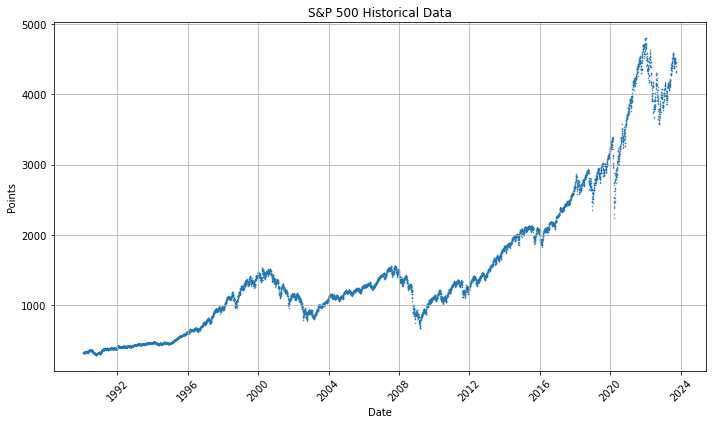

In [12]:
#FONTE: https://www.investing.com/indices/us-spx-500-historical-data

SP500_1 = pd.read_csv("S&P500_1.csv")
SP500_2 = pd.read_csv("S&P500_2.csv")
SP500 = pd.concat([SP500_1, SP500_2], ignore_index=True)

SP500['Date'] = pd.to_datetime(SP500['Date'], format='%m/%d/%Y')
SP500['Price'] = SP500['Price'].str.replace(',', '').astype(float)

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(SP500['Date'], SP500['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Points') 
plt.title('S&P 500 Historical Data')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [13]:
#Formato data ok
SP500

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-09-25,4316.69,"4,309.13","4,324.13","4,303.88",NaN,-0.08%
1,2023-09-22,4320.06,"4,341.74","4,357.40","4,316.49",NaN,-0.23%
2,2023-09-21,4330.00,"4,374.36","4,375.70","4,329.17",NaN,-1.64%
3,2023-09-20,4402.20,"4,452.81","4,461.03","4,401.38",NaN,-0.94%
4,2023-09-19,4443.95,"4,445.41","4,449.85","4,416.61",NaN,-0.22%
...,...,...,...,...,...,...,...
8477,1990-01-30,323.00,325.20,325.70,319.80,NaN,-0.68%
8478,1990-01-29,325.20,325.80,327.30,321.80,NaN,-0.18%
8479,1990-01-26,325.80,326.10,328.60,321.40,NaN,-0.09%
8480,1990-01-25,326.10,330.30,332.30,325.30,NaN,-1.27%


## Dow Jones

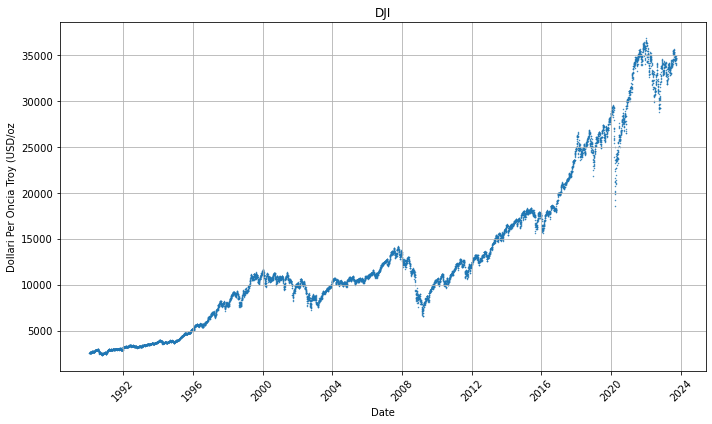

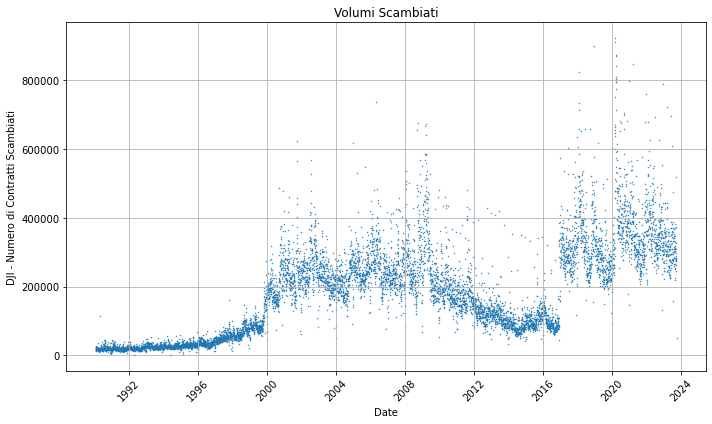

In [14]:
#FONTE: https://www.investing.com/indices/us-30-historical-data

DJI1 = pd.read_csv("DJI1.csv")
DJI2 = pd.read_csv("DJI2.csv")
DJI = pd.concat([DJI1, DJI2], ignore_index=True)

DJI['Date'] = pd.to_datetime(DJI['Date'], format='%m/%d/%Y')

DJI = DJI.sort_values(by='Date')
DJI = DJI.reset_index(drop=True)

DJI['Price'] = DJI['Price'].str.replace(',', '')

# Converti la colonna 'Price' in float
DJI['Price'] = DJI['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(DJI['Date'], DJI['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Dollari Per Oncia Troy (USD/oz') 
plt.title('DJI')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

l = []
for elem in DJI['Vol.']:
    if(type(elem) == float):
        l.append(elem)
    elif(elem[len(elem)-1] == 'K'):
        l.append(float(elem[:len(elem)-1])*1000)
    elif(elem[len(elem)-1] == 'M'):
        l.append(float(elem[:len(elem)-1])*1000)
    else:
        print("ERRORE! Ci dev'essere qualche altro suffisso tipo M o G!")
        break
DJI['Vol.'] = l

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(DJI['Date'], DJI['Vol.'], s=0.2)
plt.xlabel('Date')
plt.ylabel('DJI - Numero di Contratti Scambiati') 
plt.title('Volumi Scambiati')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [15]:
#Formato data ok
DJI

,Date,Price,Open,High,Low,Vol.,Change %
0,1990-01-24,2604.50,"2,615.32","2,615.54","2,553.38",28070.0,-0.41%
1,1990-01-25,2561.04,"2,604.50","2,616.44","2,550.68",22160.0,-1.67%
2,1990-01-26,2559.23,"2,561.04","2,583.56","2,522.52",25730.0,-0.07%
3,1990-01-29,2553.38,"2,558.78","2,572.07","2,529.05",16540.0,-0.23%
4,1990-01-30,2543.24,"2,553.38","2,562.61","2,519.14",24910.0,-0.40%
...,...,...,...,...,...,...,...
8477,2023-09-19,34518.26,"34,571.84","34,597.52","34,312.14",274280.0,-0.31%
8478,2023-09-20,34440.88,"34,575.50","34,775.41","34,436.43",284030.0,-0.22%
8479,2023-09-21,34070.35,"34,332.23","34,376.98","34,058.72",327130.0,-1.08%
8480,2023-09-22,33964.44,"34,077.08","34,156.15","33,949.17",261740.0,-0.31%


## Bonds

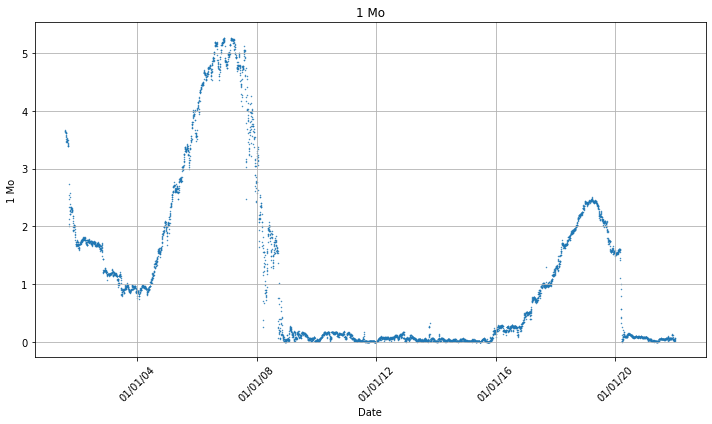

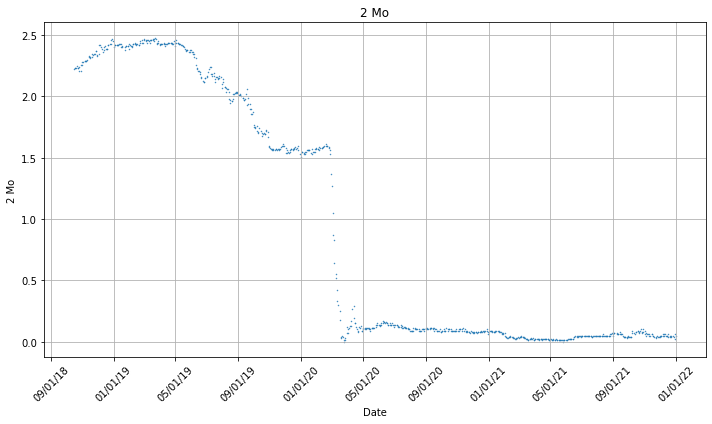

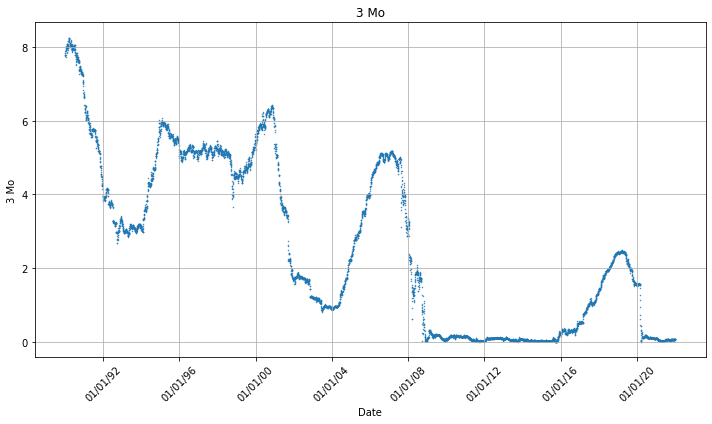

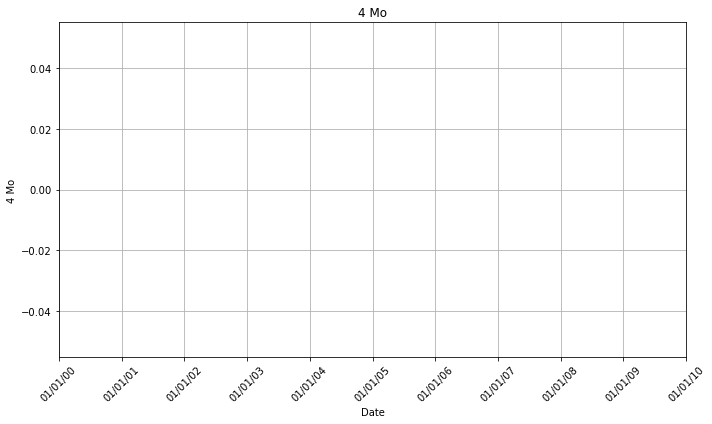

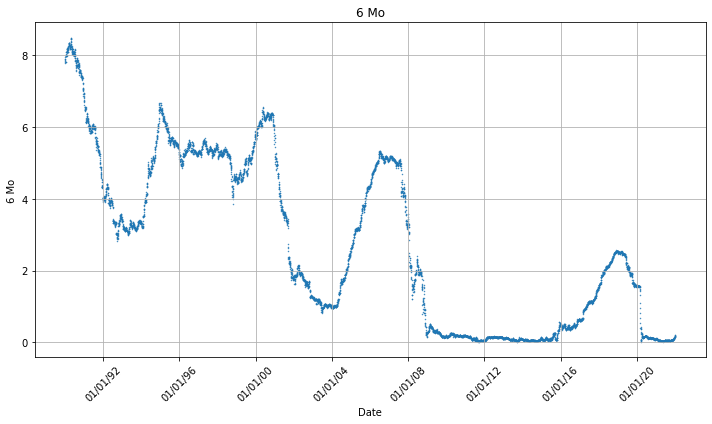

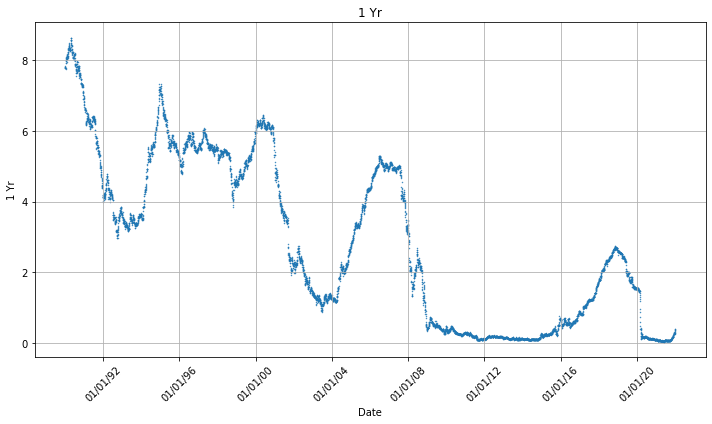

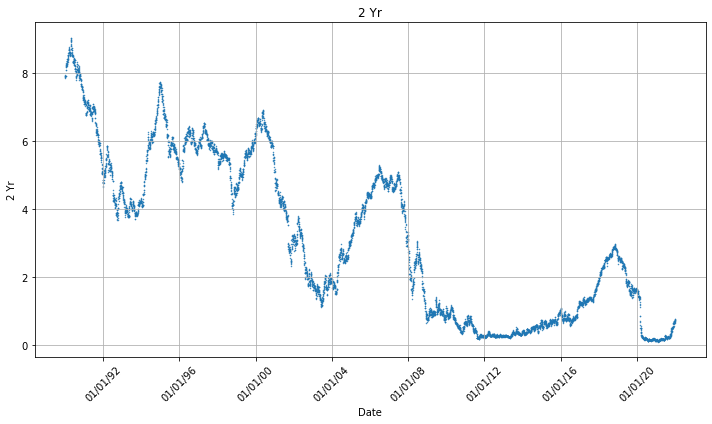

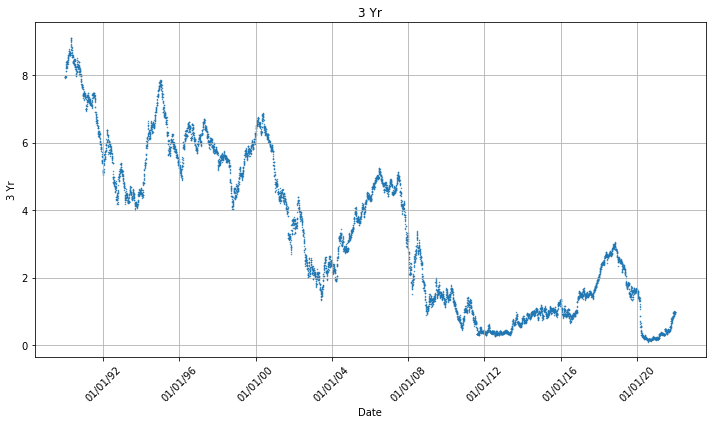

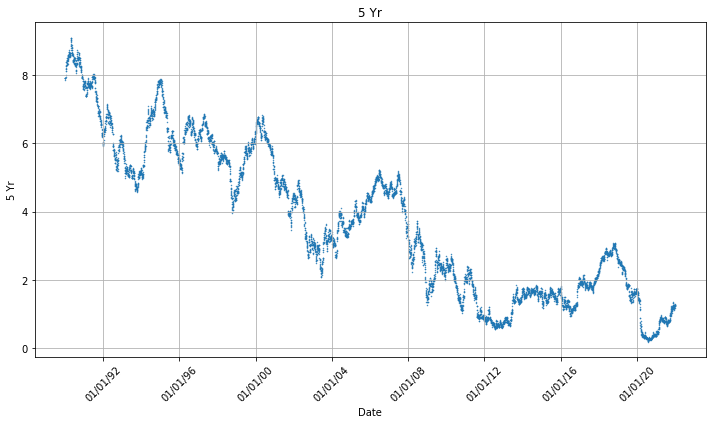

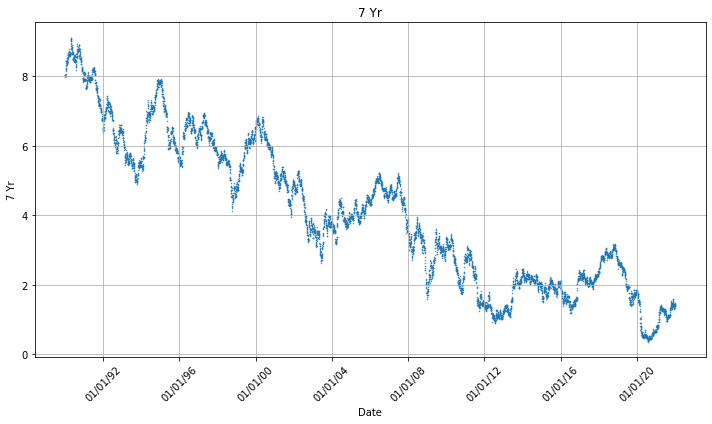

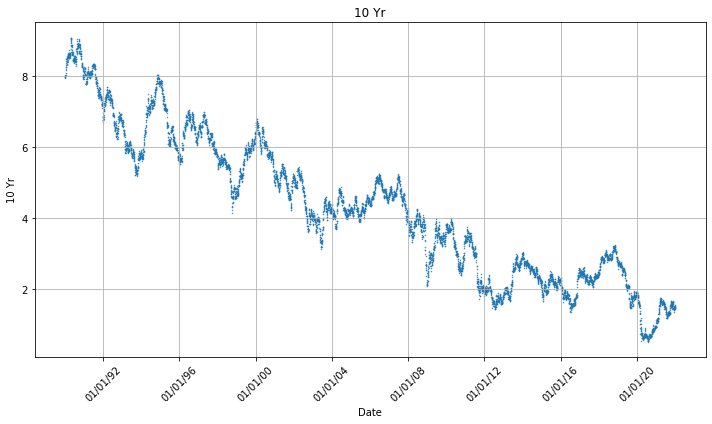

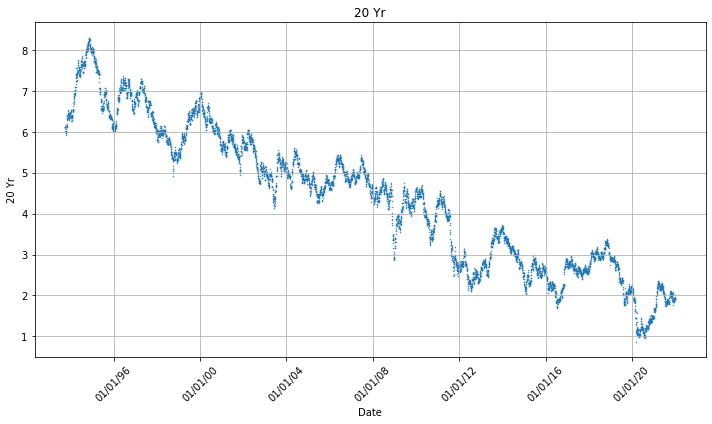

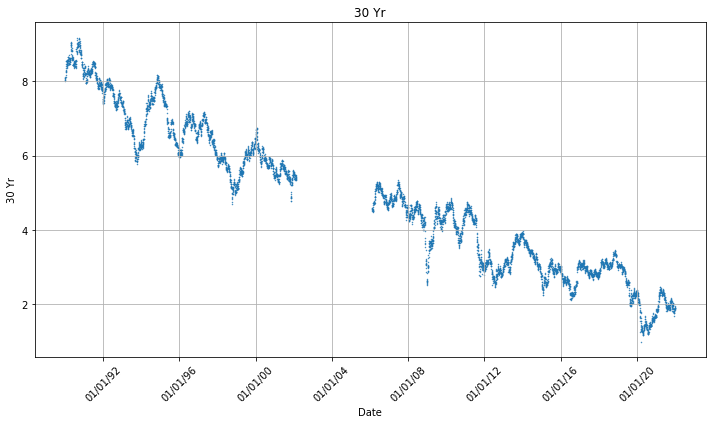

In [16]:
#FONTE: https://home.treasury.gov/interest-rates-data-csv-archive
BONDS = pd.read_csv("yield-curve-rates-1990-2021.csv")

# Converte le date in formato datetime
BONDS['Date'] = pd.to_datetime(BONDS['Date'], format='%m/%d/%y')

for col in BONDS.columns[1:]:
    # Crea lo scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(BONDS['Date'], BONDS[col], s=0.2)
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.title(col)

    # Formatta le etichette sull'asse x come date
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

    # Ruota le etichette sull'asse x per una migliore leggibilità
    plt.xticks(rotation=45)

    # Mostra la griglia e adatta il layout
    plt.grid(True)
    plt.tight_layout()

    # Mostra il plot
    plt.show()

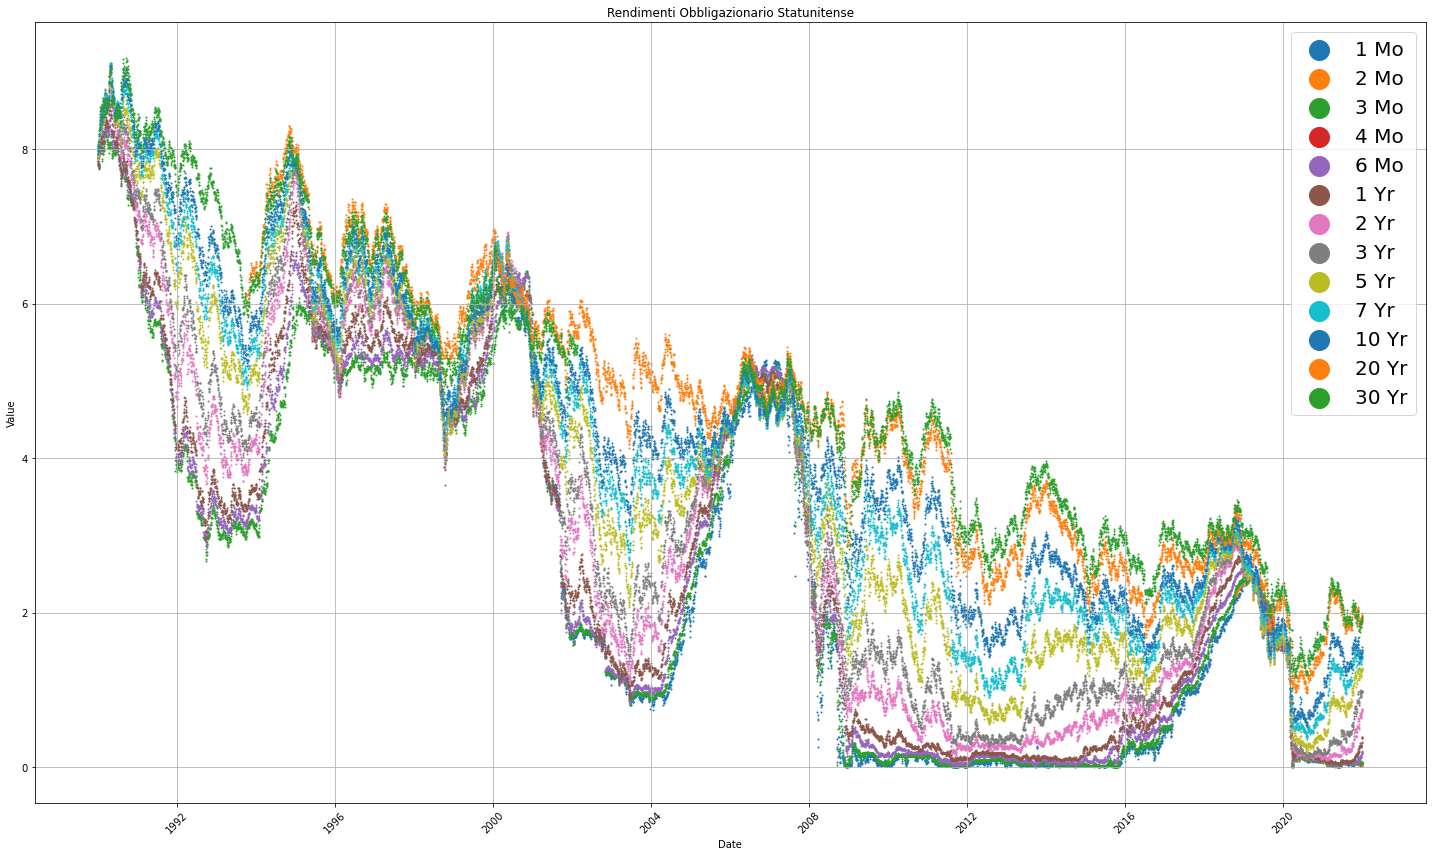

In [17]:
plt.figure(figsize=(20, 12))

# Itera sulle colonne e crea lo scatter plot rispetto alle date
for col in BONDS.columns[1:]:
    plt.scatter(BONDS['Date'], BONDS[col], label=col, s=1)

# Aggiungi etichette e titolo
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Rendimenti Obbligazionario Statunitense')

# Aggiungi la legenda
plt.legend(fontsize=20, markerscale=20)

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.grid(True)
plt.show()

In [18]:
#Formato data ok
BONDS

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2021-12-31,0.06,0.05,0.06,NaN,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.94,1.90
1,2021-12-30,0.06,0.06,0.05,NaN,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.97,1.93
2,2021-12-29,0.01,0.02,0.05,NaN,0.19,0.38,0.75,0.99,1.29,1.47,1.55,2.00,1.96
3,2021-12-28,0.03,0.04,0.06,NaN,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.94,1.90
4,2021-12-27,0.04,0.05,0.06,NaN,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.92,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8003,1990-01-08,NaN,NaN,7.79,NaN,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
8004,1990-01-05,NaN,NaN,7.79,NaN,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
8005,1990-01-04,NaN,NaN,7.84,NaN,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
8006,1990-01-03,NaN,NaN,7.89,NaN,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04


## USD/CHF

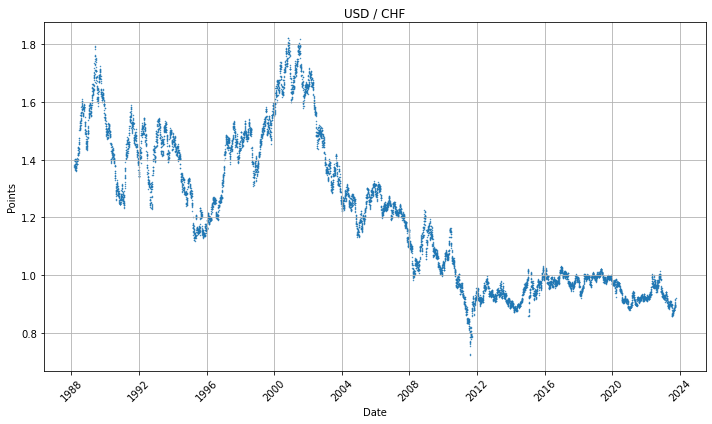

In [19]:
#FONTE: https://www.investing.com/currencies/usd-chf-historical-data

USDCHF1 = pd.read_csv("USDCHF1.csv")
USDCHF2 = pd.read_csv("USDCHF2.csv")
USDCHF = pd.concat([USDCHF1, USDCHF2], ignore_index=True)

USDCHF['Date'] = pd.to_datetime(USDCHF['Date'], format='%m/%d/%Y')
USDCHF['Price'] = USDCHF['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(USDCHF['Date'], USDCHF['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Points') 
plt.title('USD / CHF')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [20]:
#Formato data ok
USDCHF

,Date,Price,Open,High,Low,Vol.,Change %
0,2007-05-15,1.2151,1.2189,1.2205,1.2125,NaN,-0.34%
1,2007-05-14,1.2193,1.2179,1.2207,1.2167,NaN,0.02%
2,2007-05-11,1.2191,1.2204,1.2214,1.2168,NaN,-0.04%
3,2007-05-10,1.2196,1.2187,1.2224,1.2157,NaN,0.06%
4,2007-05-09,1.2189,1.2179,1.2195,1.2140,NaN,0.06%
...,...,...,...,...,...,...,...
9265,2007-05-22,1.2294,1.2307,1.2330,1.2280,NaN,-0.10%
9266,2007-05-21,1.2306,1.2279,1.2334,1.2268,NaN,0.25%
9267,2007-05-18,1.2275,1.2266,1.2283,1.2243,NaN,0.03%
9268,2007-05-17,1.2271,1.2229,1.2283,1.2196,NaN,0.34%


## USD / JPY

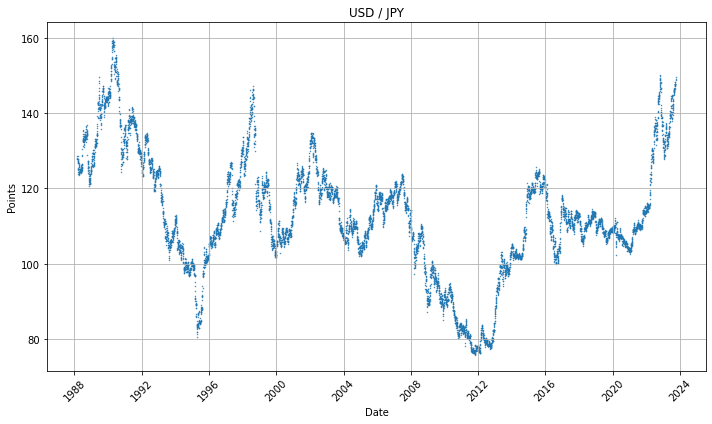

In [21]:
#FONTE: https://www.investing.com/currencies/usd-jpy-historical-data

USDJPY1 = pd.read_csv("USDJPY1.csv")
USDJPY2 = pd.read_csv("USDJPY2.csv")
USDJPY = pd.concat([USDJPY1, USDJPY2], ignore_index=True)

USDJPY['Date'] = pd.to_datetime(USDJPY['Date'], format='%m/%d/%Y')

USDJPY = USDJPY.sort_values(by='Date')
USDJPY = USDJPY.reset_index(drop=True)

USDJPY['Price'] = USDJPY['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(USDJPY['Date'], USDJPY['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Points') 
plt.title('USD / JPY')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [22]:
#Formato data ok
USDJPY

,Date,Price,Open,High,Low,Vol.,Change %
0,1988-03-04,128.58,128.58,129.26,128.56,NaN,-0.40%
1,1988-03-07,127.76,127.76,128.91,127.64,NaN,-0.64%
2,1988-03-08,127.80,127.80,128.32,127.44,NaN,0.03%
3,1988-03-09,128.12,128.12,128.24,127.64,NaN,0.25%
4,1988-03-10,127.88,127.88,128.38,127.60,NaN,-0.19%
...,...,...,...,...,...,...,...
9265,2023-09-21,147.58,148.34,148.46,147.32,NaN,-0.51%
9266,2023-09-22,148.37,147.57,148.46,147.51,NaN,0.54%
9267,2023-09-25,148.88,148.37,148.99,148.25,NaN,0.34%
9268,2023-09-26,149.05,148.91,149.21,148.70,NaN,0.11%


## USD / EUR

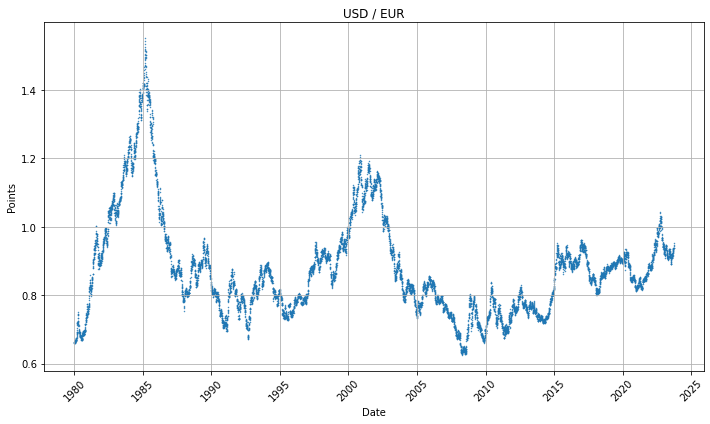

In [23]:
#FONTE: https://www.investing.com/currencies/usd-eur-historical-data

USDEUR1 = pd.read_csv("USDEUR1.csv")
USDEUR2 = pd.read_csv("USDEUR2.csv")
USDEUR3 = pd.read_csv("USDEUR3.csv")
USDEUR = pd.concat([USDEUR1, USDEUR2, USDEUR3], ignore_index=True)

USDEUR['Date'] = pd.to_datetime(USDEUR['Date'], format='%m/%d/%Y')

USDEUR = USDEUR.sort_values(by='Date')
USDEUR = USDEUR.reset_index(drop=True)

USDEUR['Price'] = USDEUR['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(USDEUR['Date'], USDEUR['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Points') 
plt.title('USD / EUR')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [24]:
#Formato data ok
USDEUR

,Date,Price,Open,High,Low,Vol.,Change %
0,1979-12-27,0.6634,0.6634,0.6634,0.6634,NaN,-0.41%
1,1979-12-28,0.6633,0.6633,0.6633,0.6633,NaN,-0.02%
2,1979-12-31,0.6631,0.6631,0.6631,0.6631,NaN,-0.03%
3,1980-01-02,0.6601,0.6601,0.6601,0.6601,NaN,-0.45%
4,1980-01-03,0.6589,0.6589,0.6589,0.6589,NaN,-0.18%
...,...,...,...,...,...,...,...
11253,2023-09-21,0.9379,0.9381,0.9420,0.9367,NaN,0.01%
11254,2023-09-22,0.9384,0.9381,0.9421,0.9370,NaN,0.05%
11255,2023-09-25,0.9439,0.9385,0.9457,0.9384,NaN,0.59%
11256,2023-09-26,0.9457,0.9440,0.9469,0.9424,NaN,0.19%


## USD / GBP

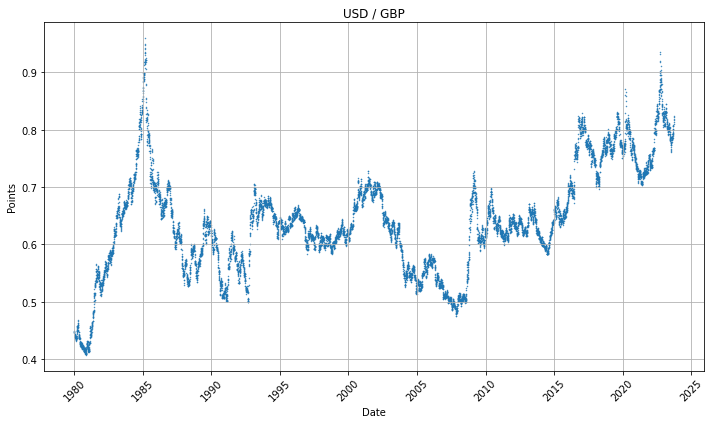

In [25]:
#FONTE: https://www.investing.com/currencies/usd-gbp-historical-data

USDGBP1 = pd.read_csv("USDGBP1.csv")
USDGBP2 = pd.read_csv("USDGBP2.csv")
USDGBP3 = pd.read_csv("USDGBP3.csv")
USDGBP = pd.concat([USDGBP1, USDGBP2, USDGBP3], ignore_index=True)

USDGBP['Date'] = pd.to_datetime(USDGBP['Date'], format='%m/%d/%Y')

USDGBP = USDGBP.sort_values(by='Date')
USDGBP = USDGBP.reset_index(drop=True)

USDGBP['Price'] = USDGBP['Price'].astype(float)
# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(USDGBP['Date'], USDGBP['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Points') 
plt.title('USD / GBP')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [26]:
#Formato data ok
USDGBP

,Date,Price,Open,High,Low,Vol.,Change %
0,1979-12-27,0.4466,0.4466,0.4466,0.4466,NaN,-1.39%
1,1979-12-28,0.4487,0.4487,0.4487,0.4487,NaN,0.47%
2,1979-12-31,0.4494,0.4494,0.4494,0.4494,NaN,0.16%
3,1980-01-02,0.4478,0.4478,0.4478,0.4478,NaN,-0.36%
4,1980-01-03,0.4457,0.4457,0.4457,0.4457,NaN,-0.47%
...,...,...,...,...,...,...,...
11240,2023-09-21,0.8130,0.8098,0.8173,0.8094,NaN,0.37%
11241,2023-09-22,0.8169,0.8130,0.8177,0.8130,NaN,0.48%
11242,2023-09-25,0.8189,0.8166,0.8201,0.8162,NaN,0.24%
11243,2023-09-26,0.8224,0.8191,0.8229,0.8185,NaN,0.43%


## Dollar Index

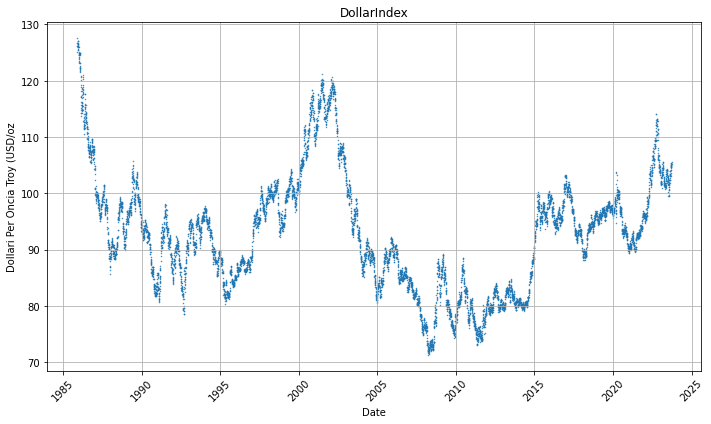

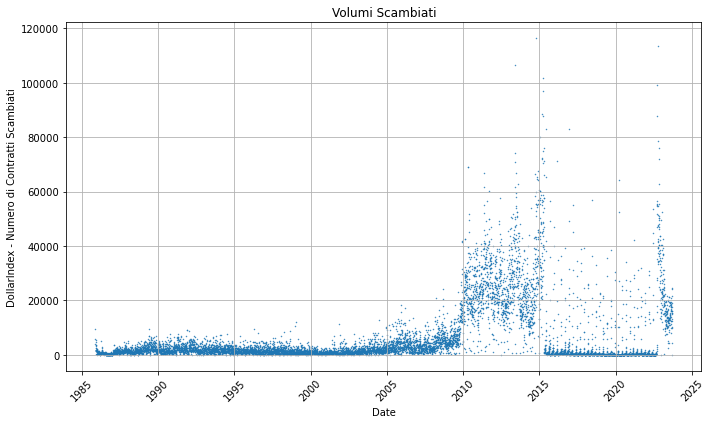

In [27]:
#FONTE: https://www.investing.com/currencies/us-dollar-index-historical-data

DollarIndex1 = pd.read_csv("DollarIndex1.csv")
DollarIndex2 = pd.read_csv("DollarIndex2.csv")
DollarIndex = pd.concat([DollarIndex1, DollarIndex2], ignore_index=True)

# Converti le date nel formato 'YYYY-MM-DD'
formatted_dates = [pd.to_datetime(date, format='%b %d, %Y').strftime('%Y-%m-%d') for date in DollarIndex['Date'].tolist()]
DollarIndex['Date'] = formatted_dates

DollarIndex['Date'] = pd.to_datetime(DollarIndex['Date'], format='%Y-%m-%d')

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(DollarIndex['Date'], DollarIndex['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Dollari Per Oncia Troy (USD/oz') 
plt.title('DollarIndex')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

l = []
for elem in DollarIndex['Vol.']:
    if(elem == '-'):
        l.append(None)
    elif(elem[len(elem)-1] == 'K'):
        l.append(float(elem[:len(elem)-1])*1000)
    elif(elem[len(elem)-1] == 'M'):
        l.append(float(elem[:len(elem)-1])*1000)
    else:
        print("ERRORE! Ci dev'essere qualche altro suffisso tipo M o G!")
        break
DollarIndex['Vol.'] = l

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(DollarIndex['Date'], DollarIndex['Vol.'], s=0.2)
plt.xlabel('Date')
plt.ylabel('DollarIndex - Numero di Contratti Scambiati') 
plt.title('Volumi Scambiati')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [28]:
#Formato data ok
DollarIndex

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-09-25,105.627,105.264,105.787,105.197,NaN,0.35%
1,2023-09-22,105.260,105.085,105.465,104.995,13220.0,0.21%
2,2023-09-21,105.044,105.130,105.440,104.960,16090.0,0.24%
3,2023-09-20,104.788,104.790,105.125,104.345,15430.0,-0.04%
4,2023-09-19,104.832,104.760,104.890,104.465,10310.0,-0.44%
...,...,...,...,...,...,...,...
9652,1985-11-27,126.160,126.260,126.550,125.730,4620.0,-0.01%
9653,1985-11-26,126.170,126.940,126.980,125.850,5350.0,-0.37%
9654,1985-11-25,126.640,126.910,126.910,126.430,3980.0,0.01%
9655,1985-11-22,126.630,127.530,127.680,126.580,5860.0,-0.73%


## VIX

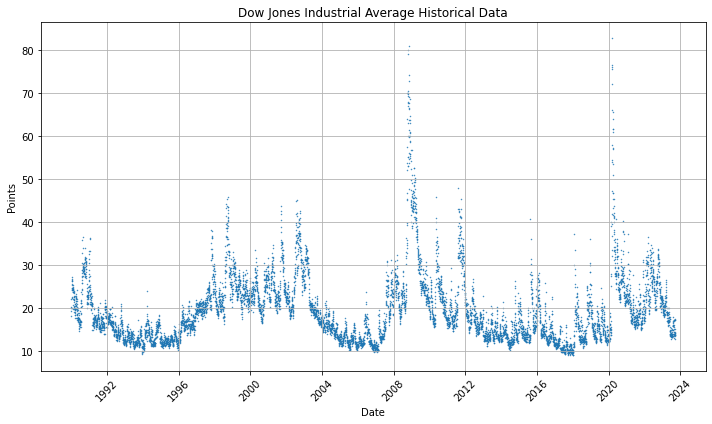

In [29]:
#FONTE: https://www.investing.com/indices/volatility-s-p-500-historical-data

VIX1 = pd.read_csv("VIX1.csv")
VIX2 = pd.read_csv("VIX2.csv")
VIX = pd.concat([VIX1, VIX2], ignore_index=True)

VIX['Date'] = pd.to_datetime(VIX['Date'], format='%m/%d/%Y')

# Crea il grafico a dispersione
plt.figure(figsize = (10, 6))
plt.scatter(VIX['Date'], VIX['Price'], s=0.2)
plt.xlabel('Date')
plt.ylabel('Points') 
plt.title('Dow Jones Industrial Average Historical Data')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [30]:
#Formato data ok
VIX

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-09-25,17.32,17.25,18.41,17.03,NaN,0.70%
1,2023-09-22,17.20,17.31,17.41,15.93,NaN,-1.94%
2,2023-09-21,17.54,15.49,17.54,15.10,NaN,15.85%
3,2023-09-20,15.14,14.18,15.15,13.57,NaN,7.30%
4,2023-09-19,14.11,14.11,14.88,13.86,NaN,0.79%
...,...,...,...,...,...,...,...
8514,1990-01-09,22.20,22.20,22.20,22.20,NaN,9.58%
8515,1990-01-08,20.26,20.26,20.26,20.26,NaN,0.75%
8516,1990-01-05,20.11,20.11,20.11,20.11,NaN,4.63%
8517,1990-01-04,19.22,19.22,19.22,19.22,NaN,5.66%


## Total GDP per Sector

In [31]:
#FONTE: https://fred.stlouisfed.org/release/tables?rid=53&eid=12998#snid=12999

GDP = pd.read_csv("GDP.csv")
PersonalConsumptionExpenditures = pd.read_csv("PersonalConsumptionExpenditures.csv")
Goods = pd.read_csv("Goods.csv")
DurableGoods = pd.read_csv("DurableGoods.csv")
NondurableGoods = pd.read_csv("NondurableGoods.csv")
Services = pd.read_csv("Services.csv")
GrossPrivateDomesticInvestment = pd.read_csv("GrossPrivateDomesticInvestment.csv")
FixedInvestment = pd.read_csv("FixedInvestment.csv")
NonResidentials = pd.read_csv("NonResidentials.csv")
Structures = pd.read_csv("Structures.csv")
Equipment = pd.read_csv("Equipment.csv")
IntellectualPropertyProducts = pd.read_csv("IntellectualPropertyProducts.csv")
Residential = pd.read_csv("Residential.csv")
ChangeInPrivateInventories = pd.read_csv("ChangeInPrivateInventories.csv")
NetExportsOfGoodsAndServices = pd.read_csv("NetExportsOfGoodsAndServices.csv")
Exports = pd.read_csv("Exports.csv")
ExportsGoods = pd.read_csv("ExportsGoods.csv")
ExportsServices = pd.read_csv("ExportsServices.csv")
Imports = pd.read_csv("Imports.csv")
ImportsGoods = pd.read_csv("ImportsGoods.csv")
ImportsServices = pd.read_csv("ImportsServices.csv")
GovernmentConsumptionExpendituresAndGrossInvestment = pd.read_csv("GovernmentConsumptionExpendituresAndGrossInvestment.csv")
Federal = pd.read_csv("Federal.csv")
NationalDefense = pd.read_csv("NationalDefense.csv")
NonDefense = pd.read_csv("NonDefense.csv")
StateAndLocal = pd.read_csv("StateAndLocal.csv")

dataframes = [ChangeInPrivateInventories,
DurableGoods,
Equipment,
Exports,
ExportsGoods,
ExportsServices,
Federal,
FixedInvestment,
GDP,
Goods,
GovernmentConsumptionExpendituresAndGrossInvestment,
GrossPrivateDomesticInvestment,
Imports,
ImportsGoods,
ImportsServices,
IntellectualPropertyProducts,
NationalDefense,
NetExportsOfGoodsAndServices,
NonDefense,
NondurableGoods,
NonResidentials,
PersonalConsumptionExpenditures,
Residential,
Services,
StateAndLocal,
Structures]

nomi_dataframes = [
'ChangeInPrivateInventories',
'DurableGoods',
'Equipment',
'Exports',
'ExportsGoods',
'ExportsServices',
'Federal',
'FixedInvestment',
'GDP',
'Goods',
'GovernmentConsumptionExpendituresAndGrossInvestment',
'GrossPrivateDomesticInvestment',
'Imports',
'ImportsGoods',
'ImportsServices',
'IntellectualPropertyProducts',
'NationalDefense',
'NetExportsOfGoodsAndServices',
'NonDefense',
'NondurableGoods',
'NonResidentials',
'PersonalConsumptionExpenditures',
'Residential',
'Services',
'StateAndLocal',
'Structures'
]

i = 0
for df, nome_df in zip(dataframes, nomi_dataframes):
    df.rename(columns={df.columns[1]: nome_df}, inplace=True)
    if i != 0:
        df.drop('DATE', axis=1, inplace=True)  
    i += 1
    
GDP = pd.concat(dataframes, axis=1)

GDP.rename(columns={'DATE': 'Date'}, inplace=True)

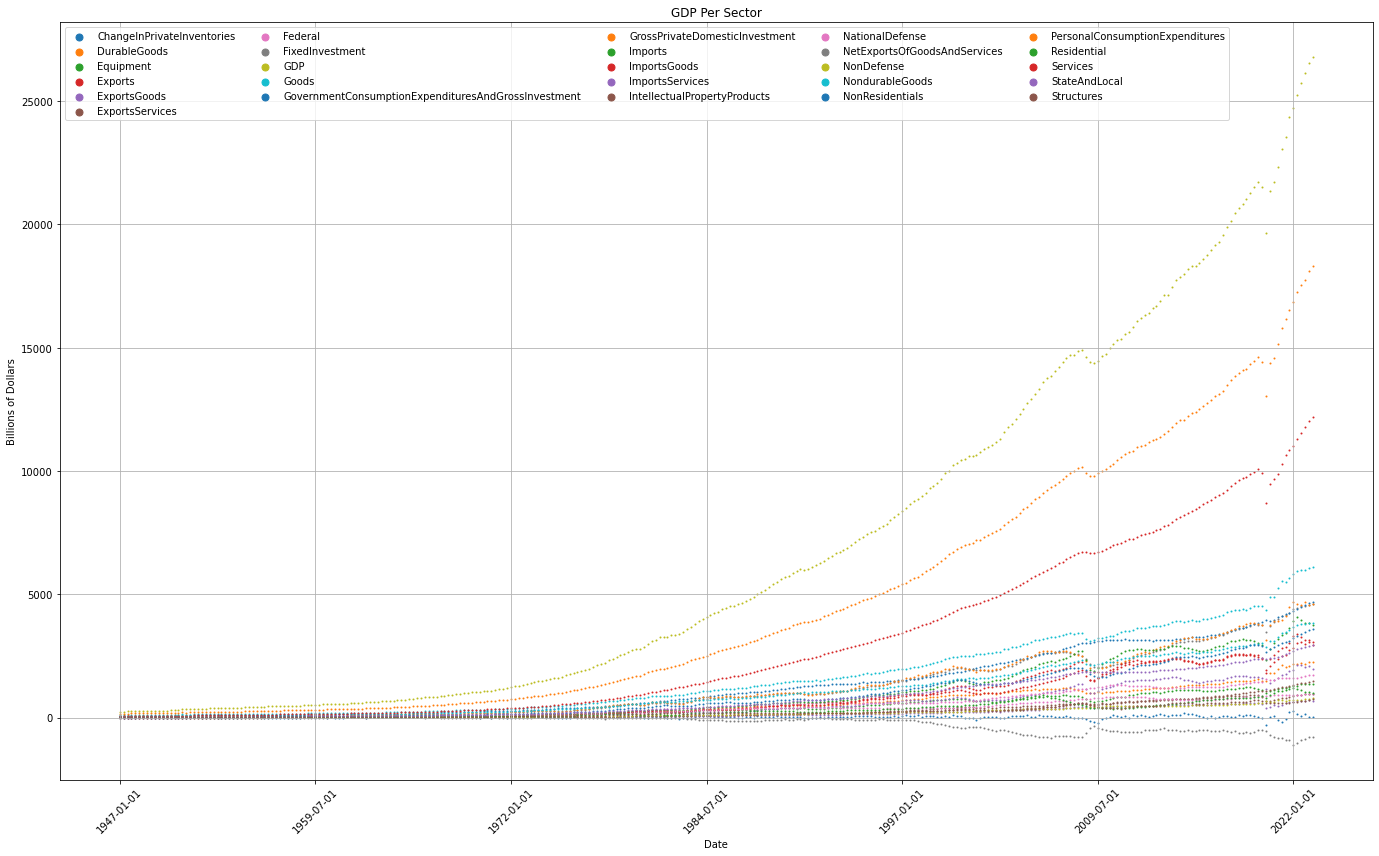

In [32]:
# Creiamo un grafico vuoto
plt.figure(figsize=(20, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in GDP.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(GDP['Date'], GDP[col], label=col, s=1)

# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Billions of Dollars')
plt.title('GDP Per Sector')

# Aggiungiamo la legenda
plt.legend(loc='upper left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)
plt.xticks(range(0, len(GDP['Date']), 50))
# Mostriamo il grafico
plt.tight_layout()
plt.grid(True)
plt.show()

In [33]:
#Formato data ok
GDP

,Date,ChangeInPrivateInventories,DurableGoods,Equipment,Exports,ExportsGoods,ExportsServices,Federal,FixedInvestment,GDP,...,NationalDefense,NetExportsOfGoodsAndServices,NonDefense,NondurableGoods,NonResidentials,PersonalConsumptionExpenditures,Residential,Services,StateAndLocal,Structures
0,1947-01-01,0.495,20.722,14.927,18.394,15.728,2.666,26.956,35.359,243.164,...,22.790,10.875,4.166,74.872,24.818,156.161,10.541,60.567,13.318,7.889
1,1947-04-01,-1.240,21.351,15.226,19.497,16.732,2.765,26.424,35.744,245.968,...,21.105,11.294,5.319,76.897,25.171,160.031,10.573,61.783,13.714,7.947
2,1947-07-01,-2.917,21.770,15.044,19.433,16.792,2.641,25.038,37.827,249.585,...,19.985,11.770,5.053,78.649,25.361,163.543,12.466,63.124,14.324,8.280
3,1947-10-01,1.456,23.488,16.067,17.636,15.136,2.500,24.525,41.794,259.745,...,20.410,9.289,4.115,79.965,26.540,167.672,15.254,64.219,15.009,8.432
4,1948-01-01,3.626,23.547,17.334,16.917,14.576,2.341,25.350,43.576,265.742,...,20.685,7.293,4.666,81.546,28.231,170.372,15.345,65.279,15.525,8.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2022-04-01,145.372,2181.760,1299.519,3038.844,2134.693,904.151,1622.727,4464.555,25248.476,...,918.332,-1035.565,704.395,3771.878,3292.154,17261.338,1172.401,11307.701,2790.049,631.222
302,2022-07-01,70.896,2195.833,1351.972,3064.971,2141.192,923.779,1657.092,4508.172,25723.941,...,935.294,-890.825,721.798,3792.740,3403.409,17542.652,1104.764,11554.079,2835.952,654.816
303,2022-10-01,161.803,2180.382,1360.107,2988.332,2040.028,948.304,1693.783,4508.010,26137.992,...,947.401,-857.068,746.382,3799.633,3467.489,17749.893,1040.521,11769.878,2881.570,691.930
304,2023-01-01,12.025,2258.862,1353.379,3046.206,2083.754,962.452,1732.077,4557.202,26529.774,...,959.183,-802.343,772.894,3820.107,3533.598,18113.068,1023.604,12034.099,2917.744,732.730


## Unemployment Rate

In [34]:
# FONTE: https://data.bls.gov/pdq/SurveyOutputServlet

# Carica il file Excel
workbook = openpyxl.load_workbook("UR.xlsx")

# Seleziona il foglio di lavoro su cui vuoi lavorare (ad esempio, il primo foglio)
sheet = workbook.active

# Crea una lista per contenere i valori delle celle (UR sta per Unemployment Rate)
UR = []

# Itera sulle righe e colonne desiderate per estrarre i dati sull'Unemployment Rate
for riga in range(13, 47):  
    for colonna in range(2, 14):  # Colonne da D a P (corrispondenti a gennaio 1990 - agosto 2023)
        if(riga == 46 and colonna > 8):
            break
        cella = sheet.cell(row=riga, column=colonna)
        UR.append(cella.value)

# Crea una lista di mesi da gennaio 1990 a agosto 2023
mesi = pd.date_range(start="1990-01-01", end="2023-08-01", freq='M')

# Crea un array con i numeri interi rappresentanti i mesi
x = np.arange(len(mesi))

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


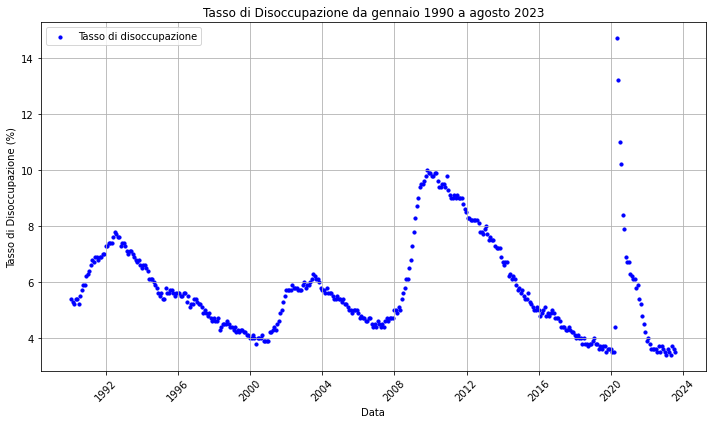

In [35]:
# Crea il plot
plt.figure(figsize=(10, 6))
plt.scatter(mesi, UR, s=10, color='b', label='Tasso di disoccupazione')

# Aggiungi etichette e titolo
plt.xlabel('Data')
plt.ylabel('Tasso di Disoccupazione (%)')
plt.title('Tasso di Disoccupazione da gennaio 1990 a agosto 2023')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [36]:
#Formato data ok
tmp = {'Date': mesi, 'UR': UR}
UR = pd.DataFrame(tmp)
UR

,Date,UR
0,1990-01-31,5.4
1,1990-02-28,5.3
2,1990-03-31,5.2
3,1990-04-30,5.4
4,1990-05-31,5.4
...,...,...
398,2023-03-31,3.5
399,2023-04-30,3.4
400,2023-05-31,3.7
401,2023-06-30,3.6


## Consumer Confidence Index (CCI)

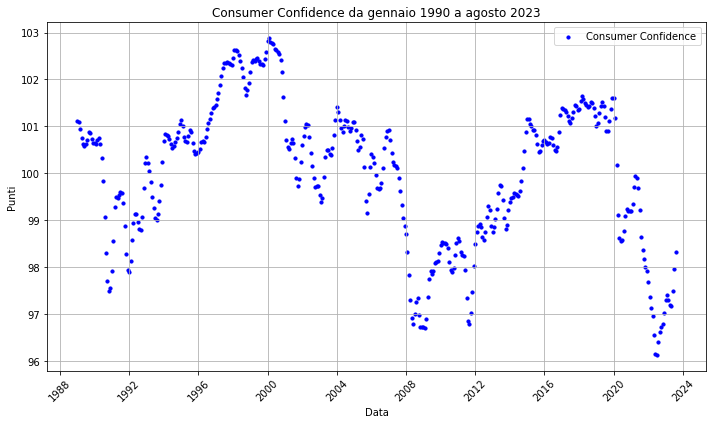

In [37]:
# FONTE: https://data.oecd.org/leadind/consumer-confidence-index-cci.htm

CCI = pd.read_csv("CCI.csv")
CCI = CCI[CCI['LOCATION'] == 'USA']
CCI = CCI.reset_index(drop=True)
CCI = CCI[["TIME", "Value"]]
CCI = CCI.rename(columns={'TIME': 'Date'})
CCI = CCI.rename(columns={'Value': 'CCI'})

# Converte la colonna 'Date' nel formato 'anno-mese-giorno'
CCI['Date'] = pd.to_datetime(CCI['Date'] + '-01', format='%Y-%m-%d')

# Crea il plot
plt.figure(figsize=(10, 6))
plt.scatter(CCI['Date'], CCI['CCI'], s=10, color='b', label='Consumer Confidence')

# Aggiungi etichette e titolo
plt.xlabel('Data')
plt.ylabel('Punti')
plt.title('Consumer Confidence da gennaio 1990 a agosto 2023')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Formato data ok
CCI

,Date,CCI
0,1989-01-01,101.11460
1,1989-02-01,101.09430
2,1989-03-01,100.94880
3,1989-04-01,100.74970
4,1989-05-01,100.61750
...,...,...
411,2023-04-01,97.18363
412,2023-05-01,97.17767
413,2023-06-01,97.48916
414,2023-07-01,97.95027


## Consumer Price Index

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


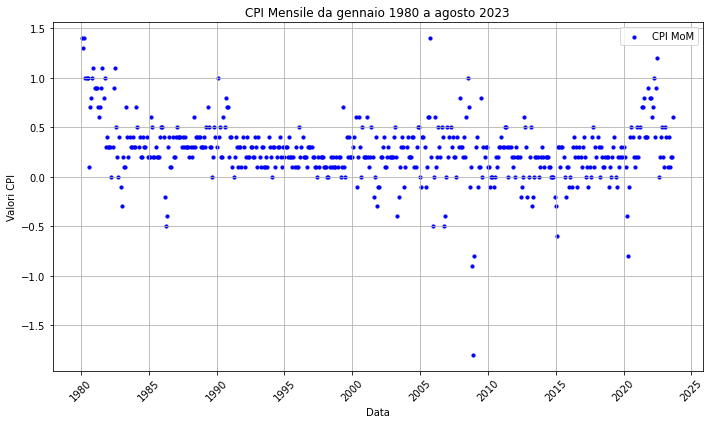

In [39]:
# FONTE: https://data.bls.gov/pdq/SurveyOutputServlet

# Carica il file Excel
workbook = openpyxl.load_workbook("CPI MoM.xlsx")

# Seleziona il foglio di lavoro su cui vuoi lavorare (ad esempio, il primo foglio)
sheet = workbook.active

# Crea una lista per contenere i valori delle celle
CPI_MoM = []

# Itera sulle righe e colonne desiderate
for riga in range(13, 57):  
    for colonna in range(2, 14):  # Colonna da D a H
        cella = sheet.cell(row=riga, column=colonna)
        CPI_MoM.append(cella.value)

# Crea una lista di mesi da gennaio 1980 a agosto 2023
mesi = pd.date_range(start="1980-01-01", end="2024-01-01", freq='M')

# Crea un array con i numeri interi rappresentanti i mesi
x = np.arange(len(mesi))

# Crea il plot
plt.figure(figsize=(10, 6))
plt.scatter(mesi, CPI_MoM, s=10, color='b', label='CPI MoM')

# Aggiungi etichette e titolo
plt.xlabel('Data')
plt.ylabel('Valori CPI')
plt.title('CPI Mensile da gennaio 1980 a agosto 2023')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#Formato data ok
tmp = {'Date': mesi, 'CPI_MoM': CPI_MoM}
CPI_MoM = pd.DataFrame(tmp)
CPI_MoM.head()

,Date,CPI_MoM
0,1980-01-31,1.4
1,1980-02-29,1.3
2,1980-03-31,1.4
3,1980-04-30,1.0
4,1980-05-31,1.0


C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


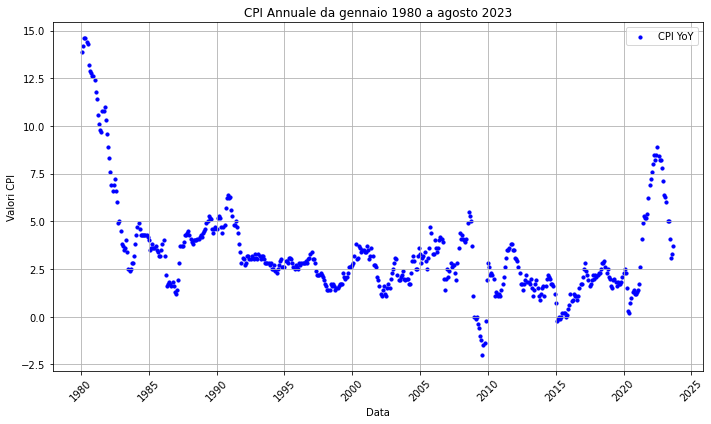

In [41]:
# FONTE: https://data.bls.gov/pdq/SurveyOutputServlet

# Carica il file Excel
workbook = openpyxl.load_workbook("CPI YoY.xlsx")

# Seleziona il foglio di lavoro su cui vuoi lavorare (ad esempio, il primo foglio)
sheet = workbook.active

# Crea una lista per contenere i valori delle celle
CPI_YoY = []

# Itera sulle righe e colonne desiderate
for riga in range(13, 57):  
    for colonna in range(2, 14):  # Colonna da D a H
        cella = sheet.cell(row=riga, column=colonna)
        CPI_YoY.append(cella.value)

# Crea una lista di mesi da gennaio 1980 a agosto 2023
mesi = pd.date_range(start="1980-01-01", end="2024-01-01", freq='M')

# Crea un array con i numeri interi rappresentanti i mesi
x = np.arange(len(mesi))

# Crea il plot
plt.figure(figsize=(10, 6))
plt.scatter(mesi, CPI_YoY, s=10, color='b', label='CPI YoY')

# Aggiungi etichette e titolo
plt.xlabel('Data')
plt.ylabel('Valori CPI')
plt.title('CPI Annuale da gennaio 1980 a agosto 2023')

# Ruota le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#Formato data ok
tmp = {'Date': mesi, 'CPI_YoY': CPI_YoY}
CPI_YoY = pd.DataFrame(tmp)
CPI_YoY.head()

,Date,CPI_YoY
0,1980-01-31,13.9
1,1980-02-29,14.2
2,1980-03-31,14.6
3,1980-04-30,14.6
4,1980-05-31,14.4


## CREAZIONE DELLA SERIE TEMPORALE COMPRENDENTE TUTTI I DATAFRAME COSTRUITI SOPRA

In [43]:
GAS = GAS.rename(columns={'Price': 'GAS'})
GAS = GAS.rename(columns={'Vol.': 'Vol.GAS'})

GAS = GAS[['Date', 'GAS', 'Vol.GAS']]

print(GAS.head())
print(GAS.tail())

        Date    GAS  Vol.GAS
0 1990-04-04  1.620     80.0
1 1990-04-05  1.615     60.0
2 1990-04-06  1.625     60.0
3 1990-04-09  1.637     40.0
4 1990-04-10  1.620     30.0
           Date    GAS   Vol.GAS
8525 2023-09-21  2.840  123550.0
8526 2023-09-22  2.879  105570.0
8527 2023-09-25  2.906  105420.0
8528 2023-09-26  2.845  167230.0
8529 2023-09-27  2.899       NaN


In [44]:
PETROLIO = PETROLIO.rename(columns={'Value': 'PETROLIO'})
print(PETROLIO.head())
print(PETROLIO.tail())

        Date  PETROLIO
0 1983-04-04     29.44
1 1983-04-04     29.44
2 1983-04-05     29.71
3 1983-04-05     29.71
4 1983-04-06     29.92
            Date  PETROLIO
20305 2023-09-08     87.51
20306 2023-09-11     87.29
20307 2023-09-11     87.29
20308 2023-09-12     88.84
20309 2023-09-12     88.84


In [45]:
RAME = RAME.rename(columns={'Price': 'RAME'})
RAME = RAME.rename(columns={'Vol.': 'Vol.RAME'})

RAME = RAME[['Date', 'RAME', 'Vol.RAME']]

print(RAME.head())
print(RAME.tail())

        Date    RAME  Vol.RAME
0 1990-01-03  1.0965    8630.0
1 1990-01-04  1.0855    8940.0
2 1990-01-05  1.0950    3640.0
3 1990-01-08  1.1135    7480.0
4 1990-01-09  1.1020    5720.0
           Date    RAME  Vol.RAME
8543 2023-09-20  3.7760   50330.0
8544 2023-09-21  3.6960  124290.0
8545 2023-09-22  3.6960   61880.0
8546 2023-09-24  3.7017       NaN
8547 2023-09-25  3.6805       NaN


In [46]:
ORO = ORO.rename(columns={'Price': 'ORO'})
ORO = ORO.rename(columns={'Vol.': 'Vol.ORO'})

ORO = ORO[['Date', 'ORO', 'Vol.ORO']]

print(ORO.head())
print(ORO.tail())

        Date    ORO  Vol.ORO
0 1990-01-24  420.4    130.0
1 1990-01-25  418.9      0.0
2 1990-01-26  423.0     10.0
3 1990-01-29  422.0     20.0
4 1990-01-30  423.9  44340.0
           Date      ORO   Vol.ORO
8570 2023-09-20  1967.10  220980.0
8571 2023-09-21  1939.60       NaN
8572 2023-09-22  1945.60       NaN
8573 2023-09-24  1944.40       NaN
8574 2023-09-25  1944.45       NaN


In [47]:
NASDAQ = NASDAQ.rename(columns={'Close': 'NASDAQ'})
NASDAQ = NASDAQ.rename(columns={'Volume': 'Vol.NASDAQ'})

NASDAQ = NASDAQ[['Date', 'NASDAQ', 'Vol.NASDAQ']]

print(NASDAQ.head())
print(NASDAQ.tail())

        Date      NASDAQ  Vol.NASDAQ
0 1971-02-05  100.000000           0
1 1971-02-08  100.839996           0
2 1971-02-09  100.760002           0
3 1971-02-10  100.690002           0
4 1971-02-11  101.449997           0
            Date        NASDAQ  Vol.NASDAQ
13262 2023-09-08  13761.530273  4160360000
13263 2023-09-11  13917.889648  4538870000
13264 2023-09-12  13773.610352  4595490000
13265 2023-09-13  13813.589844  4840310000
13266 2023-09-14  13926.049805  4649010000


In [48]:
SP500 = SP500[['Date', 'Price']]
SP500 = SP500.rename(columns={'Price': 'S&P500'})
print(SP500.head())
print(SP500.tail())

        Date   S&P500
0 2023-09-25  4316.69
1 2023-09-22  4320.06
2 2023-09-21  4330.00
3 2023-09-20  4402.20
4 2023-09-19  4443.95
           Date  S&P500
8477 1990-01-30   323.0
8478 1990-01-29   325.2
8479 1990-01-26   325.8
8480 1990-01-25   326.1
8481 1990-01-24   330.3


In [49]:
DJI = DJI.rename(columns={'Price': 'DJI'})
DJI = DJI.rename(columns={'Vol.': 'Vol.DJI'})

DJI = DJI[['Date', 'DJI', 'Vol.DJI']]

print(DJI.head())
print(DJI.tail())

        Date      DJI  Vol.DJI
0 1990-01-24  2604.50  28070.0
1 1990-01-25  2561.04  22160.0
2 1990-01-26  2559.23  25730.0
3 1990-01-29  2553.38  16540.0
4 1990-01-30  2543.24  24910.0
           Date       DJI   Vol.DJI
8477 2023-09-19  34518.26  274280.0
8478 2023-09-20  34440.88  284030.0
8479 2023-09-21  34070.35  327130.0
8480 2023-09-22  33964.44  261740.0
8481 2023-09-25  33842.40   49890.0


In [50]:
USDCHF = USDCHF[['Date', 'Price']]
USDCHF = USDCHF.rename(columns={'Price': 'USDCHF'})
print(USDCHF.head())
print(USDCHF.tail())

        Date  USDCHF
0 2007-05-15  1.2151
1 2007-05-14  1.2193
2 2007-05-11  1.2191
3 2007-05-10  1.2196
4 2007-05-09  1.2189
           Date  USDCHF
9265 2007-05-22  1.2294
9266 2007-05-21  1.2306
9267 2007-05-18  1.2275
9268 2007-05-17  1.2271
9269 2007-05-16  1.2229


In [51]:
USDJPY = USDJPY[['Date', 'Price']]
USDJPY = USDJPY.rename(columns={'Price': 'USDJPY'})
print(USDJPY.head())
print(USDJPY.tail())

        Date  USDJPY
0 1988-03-04  128.58
1 1988-03-07  127.76
2 1988-03-08  127.80
3 1988-03-09  128.12
4 1988-03-10  127.88
           Date  USDJPY
9265 2023-09-21  147.58
9266 2023-09-22  148.37
9267 2023-09-25  148.88
9268 2023-09-26  149.05
9269 2023-09-27  149.59


In [52]:
USDEUR = USDEUR[['Date', 'Price']]
USDEUR = USDEUR.rename(columns={'Price': 'USDEUR'})
print(USDEUR.head())
print(USDEUR.tail())

        Date  USDEUR
0 1979-12-27  0.6634
1 1979-12-28  0.6633
2 1979-12-31  0.6631
3 1980-01-02  0.6601
4 1980-01-03  0.6589
            Date  USDEUR
11253 2023-09-21  0.9379
11254 2023-09-22  0.9384
11255 2023-09-25  0.9439
11256 2023-09-26  0.9457
11257 2023-09-27  0.9520


In [53]:
USDGBP = USDGBP[['Date', 'Price']]
USDGBP = USDGBP.rename(columns={'Price': 'USDGBP'})
print(USDGBP.head())
print(USDGBP.tail())

        Date  USDGBP
0 1979-12-27  0.4466
1 1979-12-28  0.4487
2 1979-12-31  0.4494
3 1980-01-02  0.4478
4 1980-01-03  0.4457
            Date  USDGBP
11240 2023-09-21  0.8130
11241 2023-09-22  0.8169
11242 2023-09-25  0.8189
11243 2023-09-26  0.8224
11244 2023-09-27  0.8247


In [54]:
DollarIndex = DollarIndex.rename(columns={'Price': 'DollarIndex'})
DollarIndex = DollarIndex.rename(columns={'Vol.': 'Vol.DollarIndex'})

DollarIndex = DollarIndex[['Date', 'DollarIndex', 'Vol.DollarIndex']]

print(DollarIndex.head())
print(DollarIndex.tail())

        Date  DollarIndex  Vol.DollarIndex
0 2023-09-25      105.627              NaN
1 2023-09-22      105.260          13220.0
2 2023-09-21      105.044          16090.0
3 2023-09-20      104.788          15430.0
4 2023-09-19      104.832          10310.0
           Date  DollarIndex  Vol.DollarIndex
9652 1985-11-27       126.16           4620.0
9653 1985-11-26       126.17           5350.0
9654 1985-11-25       126.64           3980.0
9655 1985-11-22       126.63           5860.0
9656 1985-11-21       127.56           9540.0


In [55]:
print(BONDS.head())
print(BONDS.tail())

        Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0 2021-12-31  0.06  0.05  0.06   NaN  0.19  0.39  0.73  0.97  1.26  1.44   
1 2021-12-30  0.06  0.06  0.05   NaN  0.19  0.38  0.73  0.98  1.27  1.44   
2 2021-12-29  0.01  0.02  0.05   NaN  0.19  0.38  0.75  0.99  1.29  1.47   
3 2021-12-28  0.03  0.04  0.06   NaN  0.20  0.39  0.74  0.99  1.27  1.41   
4 2021-12-27  0.04  0.05  0.06   NaN  0.21  0.33  0.76  0.98  1.26  1.41   

   10 Yr  20 Yr  30 Yr  
0   1.52   1.94   1.90  
1   1.52   1.97   1.93  
2   1.55   2.00   1.96  
3   1.49   1.94   1.90  
4   1.48   1.92   1.88  
           Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
8003 1990-01-08   NaN   NaN  7.79   NaN  7.88  7.81  7.90  7.95  7.92  8.05   
8004 1990-01-05   NaN   NaN  7.79   NaN  7.85  7.79  7.90  7.94  7.92  8.03   
8005 1990-01-04   NaN   NaN  7.84   NaN  7.90  7.82  7.92  7.93  7.91  8.02   
8006 1990-01-03   NaN   NaN  7.89   NaN  7.94  7.85  7.94  7.96  7.92  8.04  

In [56]:
VIX = VIX[['Date', 'Price']]
VIX = VIX.rename(columns={'Price': 'VIX'})
print(VIX.head())
print(VIX.tail())

        Date    VIX
0 2023-09-25  17.32
1 2023-09-22  17.20
2 2023-09-21  17.54
3 2023-09-20  15.14
4 2023-09-19  14.11
           Date    VIX
8514 1990-01-09  22.20
8515 1990-01-08  20.26
8516 1990-01-05  20.11
8517 1990-01-04  19.22
8518 1990-01-03  18.19


In [57]:
print(CCI.head())
print(CCI.tail())

        Date       CCI
0 1989-01-01  101.1146
1 1989-02-01  101.0943
2 1989-03-01  100.9488
3 1989-04-01  100.7497
4 1989-05-01  100.6175
          Date       CCI
411 2023-04-01  97.18363
412 2023-05-01  97.17767
413 2023-06-01  97.48916
414 2023-07-01  97.95027
415 2023-08-01  98.32153


In [58]:
print(CPI_MoM.head())
print(CPI_MoM.tail())

        Date  CPI_MoM
0 1980-01-31      1.4
1 1980-02-29      1.3
2 1980-03-31      1.4
3 1980-04-30      1.0
4 1980-05-31      1.0
          Date  CPI_MoM
523 2023-08-31      0.6
524 2023-09-30      NaN
525 2023-10-31      NaN
526 2023-11-30      NaN
527 2023-12-31      NaN


In [59]:
print(CPI_YoY.head())
print(CPI_YoY.tail())

        Date  CPI_YoY
0 1980-01-31     13.9
1 1980-02-29     14.2
2 1980-03-31     14.6
3 1980-04-30     14.6
4 1980-05-31     14.4
          Date  CPI_YoY
523 2023-08-31      3.7
524 2023-09-30      NaN
525 2023-10-31      NaN
526 2023-11-30      NaN
527 2023-12-31      NaN


In [60]:
# Unisce i primi due dataframes inizialmente
merged_df = pd.merge(GAS, PETROLIO, on='Date', how='outer')

# Unisce gli altri dataFrames
dataframes = [RAME, ORO, NASDAQ, SP500, DJI, USDCHF, USDJPY, USDEUR, USDGBP, BONDS, VIX, DollarIndex]

classes = [GDP, CPI_MoM, CPI_YoY]

for df in dataframes:
    merged_df = pd.merge(merged_df, df, on='Date', how='outer')

merged_df = merged_df.drop_duplicates() #Rimuovo eventuali duplicati
df_ordinato = merged_df.sort_values('Date') #Ordino il Dataframe nel cosao mi fossi perso qualcosa in fondo
print(df_ordinato)

            Date    GAS   Vol.GAS  PETROLIO    RAME  Vol.RAME      ORO  \
20500 1971-02-05    NaN       NaN       NaN     NaN       NaN      NaN   
20501 1971-02-08    NaN       NaN       NaN     NaN       NaN      NaN   
20502 1971-02-09    NaN       NaN       NaN     NaN       NaN      NaN   
20503 1971-02-10    NaN       NaN       NaN     NaN       NaN      NaN   
20504 1971-02-11    NaN       NaN       NaN     NaN       NaN      NaN   
...          ...    ...       ...       ...     ...       ...      ...   
16920 2023-09-22  2.879  105570.0       NaN  3.6960   61880.0  1945.60   
20458 2023-09-24    NaN       NaN       NaN  3.7017       NaN  1944.40   
16921 2023-09-25  2.906  105420.0       NaN  3.6805       NaN  1944.45   
16922 2023-09-26  2.845  167230.0       NaN     NaN       NaN      NaN   
16923 2023-09-27  2.899       NaN       NaN     NaN       NaN      NaN   

       Vol.ORO      NASDAQ  Vol.NASDAQ  ...  2 Yr  3 Yr  5 Yr  7 Yr  10 Yr  \
20500      NaN  100.000000       

## Droppo le righe fuori dall'intervallo Q1/2005 - 2021-12-31

In [61]:
# Definisco l'intervallo di date
data_inizio = pd.to_datetime('1990-04-04')
data_fine = pd.to_datetime('2021-12-31')

# Seleziona solo le righe all'interno dell'intervallo
df_filtrato = df_ordinato[(merged_df['Date'] >= data_inizio) & (merged_df['Date'] <= data_fine)]

# Ora df_filtrato contiene solo le righe all'interno dell'intervallo specificato
df_filtrato.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\743485158.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrato = df_ordinato[(merged_df['Date'] >= data_inizio) & (merged_df['Date'] <= data_fine)]


,Date,GAS,Vol.GAS,PETROLIO,RAME,Vol.RAME,ORO,Vol.ORO,NASDAQ,Vol.NASDAQ,...,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,VIX,DollarIndex,Vol.DollarIndex
0,1990-04-04,1.620,80.0,19.78,1.1515,50.0,381.8,20190.0,435.399994,138380000.0,...,8.54,8.59,8.56,8.62,8.55,NaN,8.52,22.03,94.46,780.0
2,1990-04-05,1.615,60.0,19.43,1.1465,20.0,379.3,27530.0,433.420013,134240000.0,...,8.54,8.60,8.57,8.63,8.57,NaN,8.52,21.21,94.37,390.0
4,1990-04-06,1.625,60.0,19.15,1.1685,10.0,385.2,27040.0,430.899994,136570000.0,...,8.52,8.58,8.55,8.61,8.56,NaN,8.52,21.76,94.12,2130.0
6,1990-04-09,1.637,40.0,18.44,1.1270,0.0,380.4,26190.0,430.200012,112370000.0,...,8.54,8.60,8.58,8.65,8.59,NaN,8.55,22.30,94.18,2330.0
8,1990-04-10,1.620,30.0,17.68,1.1540,NaN,379.3,21920.0,431.899994,129500000.0,...,8.54,8.59,8.58,8.65,8.60,NaN,8.57,21.69,93.28,4010.0


In [62]:
CPI_MoM = CPI_MoM[(CPI_MoM['Date'] >= data_inizio) & (CPI_MoM['Date'] <= data_fine)]
CPI_MoM.reset_index(drop=True, inplace=True)
CPI_MoM

,Date,CPI_MoM
0,1990-04-30,0.2
1,1990-05-31,0.2
2,1990-06-30,0.6
3,1990-07-31,0.5
4,1990-08-31,0.8
...,...,...
376,2021-08-31,0.4
377,2021-09-30,0.4
378,2021-10-31,0.9
379,2021-11-30,0.8


In [63]:
CPI_YoY = CPI_YoY[(CPI_YoY['Date'] >= data_inizio) & (CPI_YoY['Date'] <= data_fine)]
CPI_YoY.reset_index(drop=True, inplace=True)
CPI_YoY

,Date,CPI_YoY
0,1990-04-30,4.7
1,1990-05-31,4.4
2,1990-06-30,4.7
3,1990-07-31,4.8
4,1990-08-31,5.7
...,...,...
376,2021-08-31,5.2
377,2021-09-30,5.4
378,2021-10-31,6.2
379,2021-11-30,6.9


## Aggiungo GDP, CPI e UR 

In [64]:
df_filtrato.reset_index(drop=True, inplace=True)

In [65]:
df_filtrato['CPI_MoM'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
i = 0
for index, row in df_filtrato.iterrows():
    if(df_filtrato.loc[index, 'Date'] > CPI_MoM.loc[i, 'Date']):
        i += 1
    df_filtrato.loc[index, 'CPI_MoM'] = CPI_MoM.loc[i, 'CPI_MoM']

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\4103054668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato['CPI_MoM'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\4103054668.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, 'CPI_MoM'] = CPI_MoM.loc[i, 'CPI_MoM']


In [66]:
df_filtrato['CPI_YoY'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
i = 0
for index, row in df_filtrato.iterrows():
    if(df_filtrato.loc[index, 'Date'] > CPI_YoY.loc[i, 'Date']):
        i += 1
    df_filtrato.loc[index, 'CPI_YoY'] = CPI_YoY.loc[i, 'CPI_YoY']

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2898490302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato['CPI_YoY'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2898490302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, 'CPI_YoY'] = CPI_YoY.loc[i, 'CPI_YoY']


In [67]:
for col in GDP.columns[1:]:
    df_filtrato[col] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
    i = 0
    tmp = []
    for index, row in df_filtrato.iterrows():
        if(df_filtrato.loc[index, 'Date'].month == 1 and df_filtrato.loc[index, 'Date'].year == 2005):
            df_filtrato.loc[index, col] = GDP.loc[i, col]
            continue
        if((df_filtrato.loc[index, 'Date'].month - 1) % 3 == 0 and ([df_filtrato.loc[index, 'Date'].month, df_filtrato.loc[index, 'Date'].year] not in tmp)):
            i += 1
            tmp.append([df_filtrato.loc[index, 'Date'].month, df_filtrato.loc[index, 'Date'].year])  
        df_filtrato.loc[index, col] = GDP.loc[i, col]

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato[col] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, col] = GDP.loc[i, col]
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato[col] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, col] = GDP.loc[i, col]
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato[col] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, col] = GDP.loc[i, col]
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\2046729022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [68]:
# Aggiungo UR

df_filtrato['UR'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
i = 0
for index, row in df_filtrato.iterrows():
    if(df_filtrato.loc[index, 'Date'] > UR.loc[i, 'Date']):
        i += 1
    df_filtrato.loc[index, 'UR'] = UR.loc[i, 'UR']

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\4132822940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato['UR'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\4132822940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, 'UR'] = UR.loc[i, 'UR']


In [69]:
# Aggiungo CCI
CCI = CCI[(CCI['Date'] >= pd.to_datetime('1990-04-01')) & (CCI['Date'] <= pd.to_datetime('2021-12-01'))] #Prima filtro il dataframe

df_filtrato['CCI'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
i = 0
CCI.reset_index(drop=True, inplace=True)

for index, row in df_filtrato.iterrows():
    if(df_filtrato.loc[index, 'Date'].month != CCI.loc[i, 'Date'].month):
        i += 1
    df_filtrato.loc[index, 'CCI'] = CCI.loc[i, 'CCI']

C:\Users\andre\AppData\Local\Temp\ipykernel_12240\1985589701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato['CCI'] = list(range(len(df_filtrato))) #Inizializzo nuova colonna
C:\Users\andre\AppData\Local\Temp\ipykernel_12240\1985589701.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato.loc[index, 'CCI'] = CCI.loc[i, 'CCI']


## Gestione dei Valori Mancanti

In [70]:
# Sostituisce i valori mancanti con l'ultimo valore valido conosciuto
df = df_filtrato.fillna(method='ffill')

In [71]:
df = df.drop(['1 Mo','2 Mo', '4 Mo', '20 Yr'], axis=1)

In [72]:
df.to_csv('TabelloneNonNormalizzato.csv', index=False)

## Normalizzo il Dataframe

In [74]:
# Seleziona le colonne da normalizzare
columns_to_normalize = df.columns[1:]

# Crea un nuovo DataFrame con solo le colonne da normalizzare
df_toNorm = df[columns_to_normalize]

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Normalizza i dati
df_toNorm = pd.DataFrame(scaler.fit_transform(df_toNorm), columns=columns_to_normalize)

# Sostituisci le colonne nel DataFrame originale con quelle normalizzate
df[columns_to_normalize] = df_toNorm

In [75]:
df.to_csv('TabelloneNormalizzato.csv', index=False)

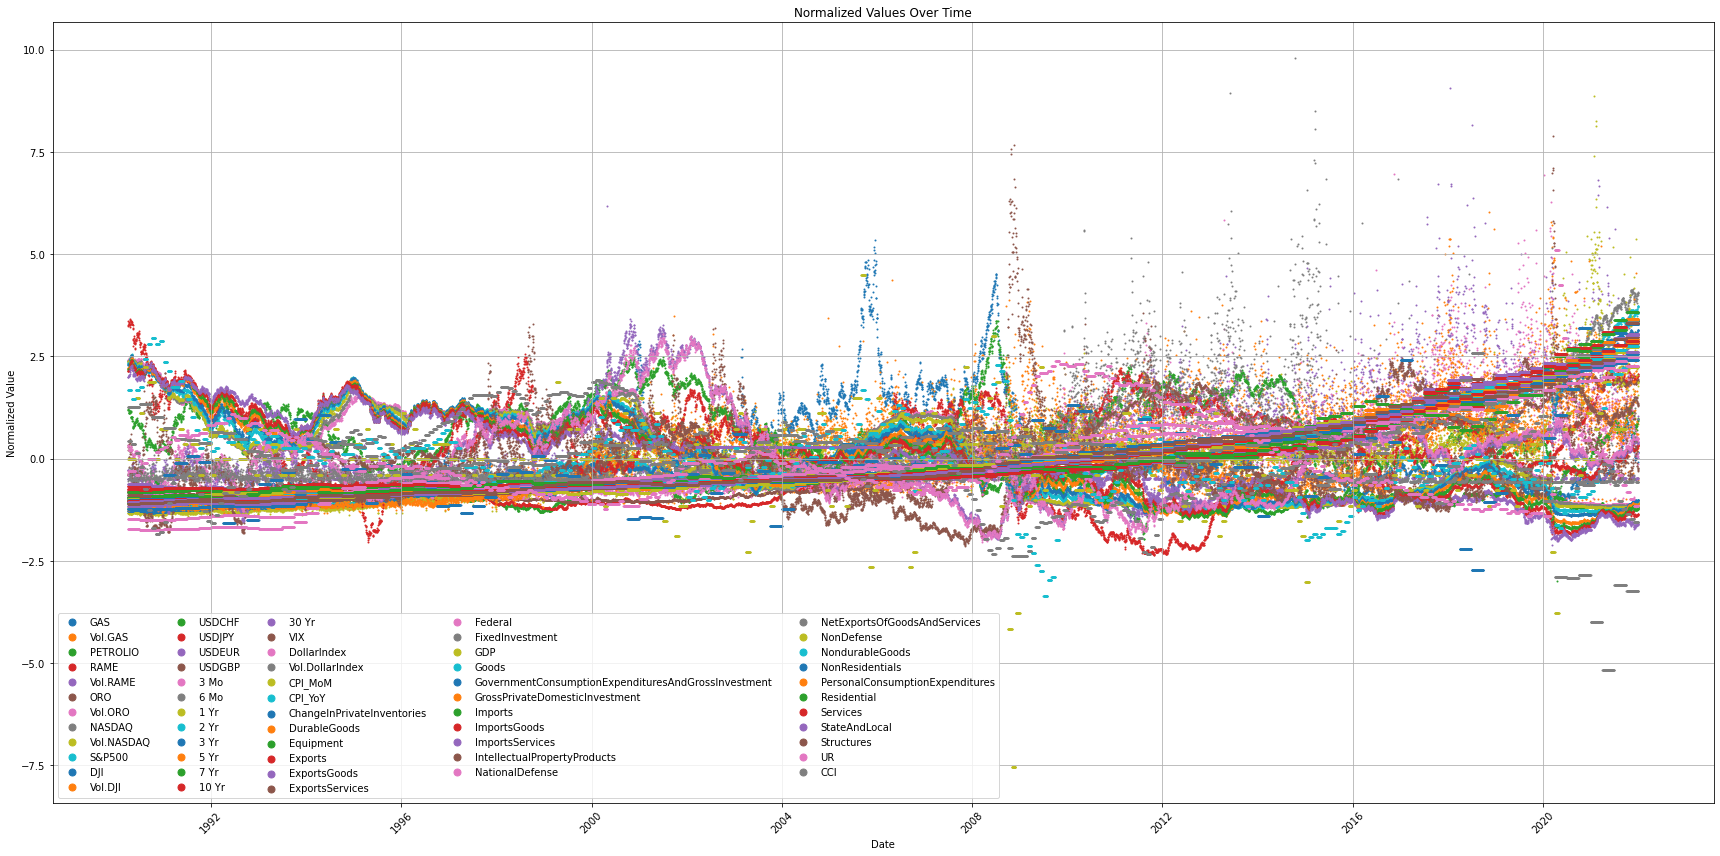

In [76]:
# Creiamo un grafico vuoto
plt.figure(figsize=(24, 12))

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)

# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Normalized Values Over Time')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

In [77]:
valori_mancanti_per_colonna = df.isnull().sum()
print("Numero di colonne del DataSet:", len(df.columns))
print()
print(valori_mancanti_per_colonna)

Numero di colonne del DataSet: 59

Date                                                   0
GAS                                                    0
Vol.GAS                                                0
PETROLIO                                               0
RAME                                                   0
Vol.RAME                                               0
ORO                                                    0
Vol.ORO                                                0
NASDAQ                                                 0
Vol.NASDAQ                                             0
S&P500                                                 0
DJI                                                    0
Vol.DJI                                                0
USDCHF                                                 0
USDJPY                                                 0
USDEUR                                                 0
USDGBP                                               